In [1]:
import numpy as np
import pandas as pd
import os
import re
from tqdm import tqdm
import ast
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import string
from IPython.display import Markdown

Préambule 43

In [2]:
texte_1 = 'sane cum de culminis nostri fulgore, velut ex sole radii, sic omnium largiente conditore prodeant dignitates ut prime lucis integritas minorati luminis non sensiat detrimenta, nam tanto magis regale sceptrum extollitur tantoque curia regiminis sollicitudinibus relevatur, quanto tribunal ipsius digniores circumspicit contribules ; hac igitur consideratione ducti, quia regni Francie moderamur habenas, solii nostri decus tam veterum dignitatum ornatibus confoveri quam etiam novis ardemus honoribus ampliari, et licet ad quorumlibet nostrorum fidelium munifice prosequenda servicia liberalitas nostra quadam generalitate sit proclivis, illis tamen est quadam specialitate debitrix et eorum vota prosequi liberaliter affectamus, in quibus sanguinis connexitatem et vinculum agnoscimus et puram fidei constanciam invenimus, ut ipsi, fervore devocionis accensi, reddantur de bono in melius circa majestatem regiam et ejus obsequia promptiores, et ne percepta dudum obsequia que conscribi perhenniter in libro memorie meruerunt preminentia gradus aboleat vel incompensata relinquat.'

pierre_1a = 'De fulgore throni cesarei, velut ex sole radii, sic certe prodeunt dignitates, ut prime lucis integritas non sentiat minorati luminis detrimenta, tantoque magis imperiale sceptrum extollitur, tanto cura regiminis pluria sollicitudinibus relevatur, quanto tribunal ipsius digniores in circuitu circumspicit contribules regiones. Hac igitur consideratione commoti, qui celesti providentia romani imperii moderamur habenas, solii nostri decus tam veterum dignitatum ornatibus confovemus, quam novis honoribus ampliamur.'

pierre_1b = 'Licet ad quorumlibet nostrorum fidelium, munifice prosequenda servicia liberalitatis nostre manus quadam generalitate sit habilis, illis tamen quadam specialitate fit debitrix, in quibus sanguinis idemptitatem agnoscimus et fidei pure constanciam invenimus […].'

Préambule 116

In [3]:
texte_2 = 'decet excellentiam regiam pene duriciem quam juris rigor dictat aliquando pietatis mitigare, cum per hoc subditorum succrescat devocio et honor regius occulis augeatur.'

pierre_2 = 'satis nobis cedit ad gloriam et nostris fidelibus ad profectum, si motus nostros, quos armat potentia, sic mansuetudine decoremus, ut pene duriciem quam iuris rigor aliquando dictat in subditis clementie nostre molliamus unguentis, cum crescat in subditis devocionis vigor, dum pena remittitur, et dum devotorum succrescit cumulus nostri honoris per consequens titulus augeatur.'

Préambule 118

In [4]:
texte_3 = 'Decus est principum subditorum votis clementer annuere ac eorum preces misericorditer exaudire ; etsi ad prosequenda vota fidelium regia liberalitas regulariter sit habilis, illud tamen occurrit precipuum, ut hiis qui reipublice se exposcunt, prefata liberalitas specialitate quadam graciosior et liberior porrigatur, ut sic per gratiam diligantur in populis et per Dominum tueantur in terris.'

pierre_3a = 'Decus est principum fidelium votis clementer annuere, ac supplicum preces misericorditer exaudire, ut sic per gratiam diligantur in populis et per dominium tueantur in terris.'

pierre_3b = 'licet ad prosequenda munificentie sic vota fidelium liberalitatis regie dextera generali quadam irregularitate sic sit habilis, illis tamen graciosa porrigitur quadam specialitate liberior, quos ad obsequia grata continuos fructus sic et utiles semper claris indiciis experimur.'

Préambule 140

In [5]:
texte_4 = 'Dignum esse credimus ac consonum racioni atque concordabile reputamus ut hiis quos in legitimis actibus deffectus natalium impedit legitimacionis honor per principem reperiatur et, si quando super hiis magestatis regie favor seu benivolentia fidelium suorum aut eorum, qui regie magestatis fideles esse desiderant et in eadem fidelitate manere et perseverare noscuntur, supplicacione requiritur, liberaliter largiatur.'

pierre_4 = 'Dignum esse decrevimus et consentaneum rationi, ut hii quos interdum in legittimis actibus defectus natalium impedit, legittimacionis honore per principem reparentur, et si quando super hiis imperialis favor fidelium suorum supplicatione requiritur, liberaliter largiatur […].'


Préambule 141

In [6]:
texte_5 = 'dignum esse credimus et summo Regi placere, si lapsis interdum per culpe obvicium celeri remedio subvenimus, cum per hoc crescat vigor in subditis et nostri honoris cumulus augeatur.'

pierre_5a = 'pulcrum in subditis humanitatis opus exequimur, si lapsis interdum per lubrice culpe convicium, misericordie celeri remedio subvenimus […].'

pierre_5b = 'cum crescat in subditis vigor, dum pena remittitur, et dum devotorum succrescit cumulus nostri honoris per consequens titulus augeatur.'

Préambule 152

In [7]:
texte_6 = 'dignum opus prosequi credimus, innata nobis regali clemencia suadente, si interdum per lubrice culpe lapsis convicium ad indulgendum se nostra manus habilitet, rigorem tamen nostram taliter temperando quod partes justicie totaliter non excludat ; et licet ad hoc libenter erga omnes clemencie regie dexteram extendamus, illam tamen circa illos libentius extendimus in quibus devocionis et pure fidelitatis constanciam inviolabiliter reperimus.'

pierre_6a = 'nobile opus sedentis in solio clemencia suadente prosequimur, si per lubrica culpe deliramenta cadentibus, ad sublevanda remedia, cito se nostra manus habilitat, et indulgemus obnoxiis, veniam post reatum, pulcrum vindicte genus exstimantes ignoscere, et sic materialis gladii refrenare licentiam, ut seviendi voluntate sopita, temperemus interdum misericordie condimento rigorem.'

pierre_6b = 'pulcrum in subditis humanitatis opus exequimur, si lapsis interdum per lubrice culpe convicium, misericordie celeri remedio subvenimus. cum summum vindicte genus credentes ignoscere nolumus semper culpas delere per gladium, in quibus rigorem possumus temperamento clementie mitigare.'

pierre_6c = 'Quam sit favorabilis magnificentia cesaris et quam sit affabilis misericordiam petentibus vultus eius ex presentis negocii serie potestis aperte convincere, in quo sic est operatus iusticiam, ut per misericordie semitas dirigat gressus suos, sic misericorditer est profectus, ut partes iusticie non excludat […].'


Préambule 163

In [8]:
texte_7 = 'egregium humanitatis opus in subditis agere credimus, innata nobis regali clementia suadente, si interdum per lubrica culpe delinimenta collapsis et veniam petentibus post reatum, humane condicionis fragilitate pensata, lenimento misericordie subvenimus, cum fervor devocionis et fidei sinceritas in subditis augeatur qui a culpis per regalem clementiam abluuntur.'

pierre_7a = 'nobile opus sedentis in solio clementia suadente prosequimur, si per lubrica culpe deliramenta cadentibus, ad sublevanda remedia, cito se nostra manus habilitat et indulgemus obnoxiis veniam post reatum, pulcrum vindicte genus exstimantes ignoscere, et sic materialis gladii refrenare licentiam, ut seviendi voluntate sopita, temperemus interdum misericordie condimento rigorem.'

pierre_7b = 'um crescat in eis etiam erga nos vigor devocionis et fidei, si fragilitatis humane memores aliquid severitati detrahimus, et que punire possemus in gladio, lenimento misericordie mitigamus.'

pierre_7c = 'pulcrum in subditis humanitatis opus exequimur, si lapsis interdum per lubrice culpe convicium, misericordie celeri remedio subvenimus, cum summum vindicte genus credentes ignoscere, nolumus semper culpas delere per gladium in quibus rigorem possumus temperamento clemencie mitigare […].'


Préambule 164

In [9]:
texte_8 = 'egregium humanitatis opus in subditis prosequi credimus, innata nobis regali clementia suadente, si interdum per lubrice culpe lapsis convicium, humane condicionis fragilitate pensata, misericorditer subvenimus ; non est rigor justicie taliter in omnibus observandus, quin interdum possit et debeat linimento misericordie temperari.'

pierre_8 = 'pulcrum in subditis humanitatis opus exequimur, si lapsis interdum per lubrice culpe convicium, misericordie celeri remedio subvenimus, cum summum vindicte genus credentes ignoscere, nolumus semper culpas delere per gladium in quibus rigorem possumus temperamento clemencie mitigare […].'


Préambule 205

In [10]:
texte_9 = 'lla decet regiam dignitatem frui mansuetudine et prerogativa virtutis ut, attendens quod, si culpa non precederet, locum venia non haberet, benignitas regia, si suum subditum quadam forsan necessitate potius quam voluntate a fide debita contigerit deviasse et, postmodum errorem suum sapienter advertens, ad gratiam reconciliationis admitti supplicat puro corde, paratis brachiis ipsum recipiat, oblita preterita culpa sua.'

pierre_9 = 'Illa fruimur ex imperii dignitate mansuetudine sic, ac prerogativa virtutis, ut quia nisi culpa precederet locum venia non haberet, sed quacumque hora subditus ad fidem nostram conversus fuerit, patulis brachiis recipiamus eumdem, obliti preterite culpe sue.'


Préambule 215

In [11]:
texte_10 = 'In culpis delinquentium puniendis, personarum et temporum qualitate pensata, temperamus interdum gratie condimento rigorem.'

pierre_10 = 'nobile opus sedentis in solio clemencia suadente prosequimur, si per lubrica culpe deliramenta cadentibus, ad sublevanda remedia cito se nostra manus habilitat, et indulgemus obnoxiis veniam post reatum, pulcrum vindicte genus exstimantes ignoscere, et sic materialis gladii refrenare licentiam, ut seviendi voluntate sopita, temperemus interdum misericordie condimento rigorem.'


Préambule 226

In [12]:
texte_11 = 'Inter cetera que sollicitudinis nostre cura quotidiana meditatione revolvit, illud occurrit nostre considerationi precipuum ut venerandus ortodoxe [sic] fidei nostre cultus nobis traditus per os prophetarum, apostolorum et quattuor evangelistarum nostre fidei catholice fidelium testium et scribarum, quorum sonus in orbem exiit universum, nostris temporibus augeatur subditique nostri in unionis federe pacis transquillitate gaudeant et fruantur ; ex hiis quidem potest augeri culminis nostri felicitas et subditorum nostrorum status servari pacificus, si Regi regum grato primitus devotionis obsequio placeamus et status ecclesiasticus in sua regularitate populusque nostro commissus regimini sub unionis nexu in sua integritate serventur.'

pierre_11 = 'Inter cetera, que sollicitudinis nostre cura cotidiana diligenti meditatione revolvit, illud occurrit nostre considerationi precipuum, qualiter venerandus orthodoxe fidei nostre cultus debito a nobis et nostris fidelibus affectu et devota veneratione colatur, ut quo pre ceteris principibus divina dextera nostrum erigit altius solium, eo pro [sic] per officiose gratitudinis debitum, nostra et nostrorum ubique devotio sibi solvat munera gratiarum. Ex eo si quidem potest regnantium felicitas augeri potissime et subditorum status servari pacificus, si Regi regum grato devotionis exennio placeamus, nec ex alicuius scandali suprectione dampnabili cultus debet postponi, vel intermitti dominicus, quia quo amplius humana scandala quandoque lasciviunt, eo sepefactus sedator esset devotius exorandus.'


Préambule 258

In [13]:
texte_12 = 'Licet ad quorumlibet vota munifice prosequenda liberalitas nostra quadam generalitate sit proclivis, illis tamen est quadam specialitate debitrix quos ad regie celsitudinis grata obsequia promptos et utiles claris judiciis experimur.'

pierre_12a = 'Licet ad quorumlibet nostrorum fidelium, munifice prosequenda servicia liberalitatis nostre manus quadam generalitate sit habilis, illis tamen quadam specialitate fit debitrix, in quibus sanguinis idemptitatem agnoscimus et fidei pure constanciam invenimus […].'

pierre_12b = 'Licet ad prosequenda munificentie [sic] vota fidelium liberalitatis regie dextera generalita quadam irregularitate [sic] sit habilis, illis tamen graciosa porrigitur, quadam specialitate liberior, quos ad obsequia grata continuos fructus [sic] et utiles claris semper indiciis experimur.'


Préambule 339

In [14]:
texte_13 = 'Opus insigne presidentis in solio in nobis clementia suggerente proficimus, si per lubrica culpe delinimenta labentibus misericordie celeri levamine subvenimus.'

pierre_13a = 'Opus in nobis egregium, clemencia suggerente, perficimus, si per lubrica culpe deliramenta labentibus, misericordie celeris remediosubvenimus '

pierre_13b = 'nobile opus sedentis in solio clemencia suadente prosequimur, si per lubrica culpe deliramenta cadentibus'


Préambule 359

In [15]:
texte_14 = 'Pulcrum vindicte genus estimantes ignoscere, temperamus interdum gratie condimento rigorem.'

pierre_14 = 'nobile opus sedentis in solio clemencia suadente prosequimur, si per lubrica culpe deliramenta cadentibus, ad sublevanda remedia, se cito nostra manus habilitat, et indulgemus obnoxiis veniam post reatum, pulcrum vindicte genus exstimantes, ignoscere, et sic materialis gladii refrenare licentiam, ut seviendi voluntate sopita, temperemus interdum misericordie condimento rigorem.'


Préambule 497

In [16]:
texte_15 = 'Satis nobis, quem Rex regum ad regie dignitatis fastigia provexit, cedit ad gloriam, si motus nostros virtute clementie perficimus et mansuetudinem in subditis excercemus, cum crescat etiam erga nos vigor devotionis et fidei, si, fragilitatis humane memores, aliquid severitati detrahimus et que punire possemus lenimento misericordie mittigamus.'

pierre_15 = 'Satis nobis cedit ad gloriam et regie dignitatis fastigia sublimamus sic, si motus nostros clemencie virtute perspicimus sic, et mansuetudinem in subditis exercemus, cum crescat in eis etiam erga nos vigor devocionis et fidei si fragilitatis humane memores aliquid severitati detrahimus, et que punire possemus in gladio, lenimento misericordie mitigamus'

In [17]:
def remove_characters(input_string, characters_to_remove):
    translator = str.maketrans('', '', characters_to_remove)
    cleaned_string = input_string.translate(translator)
    return cleaned_string

In [18]:
from text_matcher import matcher
from text_matcher.matcher import Text, Matcher

In [19]:
characters_to_remove = string.punctuation + '[]' +'–'

In [20]:
texte_2 = remove_characters(texte_2,characters_to_remove).lower().lstrip().rstrip().replace('j','i')
pierre_2 = remove_characters(pierre_2,characters_to_remove).lower().lstrip().rstrip().replace('j','i')

In [21]:
def string_to_trigrams(input_string):
    trigrams = [input_string[i:i+3] for i in range(len(input_string) - 2)]
    return trigrams

In [22]:
def find_trigram_indices(trigram, phrase):
    words = phrase.split()
    trigram_indices = []

    for i in range(len(words) - 2):
        if ' '.join(words[i:i+3]) == trigram:
            trigram_indices.extend([i, i+1, i+2])
    return trigram_indices

In [23]:
def replace_words_with_str(string_list, index_list):
    for index in index_list:
        if 0 <= index < len(string_list):
            words = string_list[index].split()
            replaced_words = ['**str**' if word.isalpha() else word for word in words]
            string_list[index] = ' '.join(replaced_words)

In [24]:
def get_first_numbers(numbers):
    result = []
    current_sequence = []

    for num in numbers:
        if not current_sequence or num == current_sequence[-1] + 1:
            current_sequence.append(num)
        else:
            result.append(current_sequence[0])
            current_sequence = [num]

    if current_sequence:
        result.append(current_sequence[0])

    return result

In [25]:
def get_common_text(texte1,pierre1):
    
    texte1 = remove_characters(texte1,characters_to_remove).lower().lstrip().rstrip().replace('j','i')
    pierre1 = remove_characters(pierre1,characters_to_remove).lower().lstrip().rstrip().replace('j','i')
    
    texte_tri = string_to_trigrams(texte1.split())
    pierre_tri = string_to_trigrams(pierre1.split())
    
    liste_trigrams = []
    for i in range(len(pierre_tri)):
        if pierre_tri[i] in texte_tri:
            liste_trigrams.append(pierre_tri[i])
    indices_trigrams = []
    for i in range(len(pierre_tri)):
        if pierre_tri[i] in texte_tri:
            indices_trigrams.append(i)
            
    index = get_first_numbers(indices_trigrams)
    
    texte_split = texte1.split()
    pierre_split = pierre1.split()
    
    index_texte = []
    index_pierre = []
    
    for i in index:
    
        trigram = pierre_tri[i]

        x = ' '.join(trigram)
        texte = find_trigram_indices(x,texte1)
        pierre = find_trigram_indices(x,pierre1)

        i = -1

        while texte_split[texte[i]+1] == pierre_split[pierre[i]+1]:
            texte.append(texte[-1]+1) 
            pierre.append(pierre[-1]+1)
         
        index_pierre.append(pierre)
        index_texte.append(texte)
        

        for i in pierre:
            pierre_split[i] = f'**{pierre_split[i]}**'
        pierre_final = ' '.join(pierre_split)
        for i in texte:
            texte_split[i] = f'**{texte_split[i]}**'
        texte_final = ' '.join(texte_split)

        #display(Markdown(pierre_final))
        #print('-------')
        #display(Markdown(texte_final))
        #print('--------')
    
    texte_final = ' '.join(texte_split)
    pierre_final = ' '.join(pierre_split)
    print('----------')
    display(Markdown(texte_final))
    print('----------')
    display(Markdown(pierre_final))    
    print('----------')

In [26]:
def get_common_tri(sentence1,sentence2):
    
    texte1 = remove_characters(sentence1,characters_to_remove).lower().lstrip().rstrip().replace('j','i').replace('v','u')
    pierre1 = remove_characters(sentence2,characters_to_remove).lower().lstrip().rstrip().replace('j','i').replace('v','u')

    texte_tri = string_to_trigrams(texte1.split())
    pierre_tri = string_to_trigrams(pierre1.split())

    liste_trigrams = []
    for i in range(len(pierre_tri)):
        if pierre_tri[i] in texte_tri:
            liste_trigrams.append(pierre_tri[i])
    indices_trigrams = []
    for i in range(len(pierre_tri)):
        if pierre_tri[i] in texte_tri:
            indices_trigrams.append(i)


    index = get_first_numbers(indices_trigrams)

    texte_split = texte1.split()
    pierre_split = pierre1.split()

    index_texte = []
    index_pierre = []


    for i in index:

        trigram = pierre_tri[i]

        x = ' '.join(trigram)
        texte = find_trigram_indices(x,texte1)
        pierre = find_trigram_indices(x,pierre1)

        taille_texte = len(texte_split)
        taille_pierre = len(pierre_split)

        i = -1

        while texte[i]+1 < taille_texte and pierre[i]+1 < taille_pierre:
            if texte_split[texte[i]+1]  == pierre_split[pierre[i]+1]:
                texte.append(texte[-1]+1) 
                pierre.append(pierre[-1]+1)
            else:
                break

        index_pierre.append(pierre)
        index_texte.append(texte)

        for i in pierre:
            pierre_split[i] = f'**{pierre_split[i]}**'
        pierre_final = ' '.join(pierre_split)
        for i in texte:
            texte_split[i] = f'**{texte_split[i]}**'

    texte_final = ' '.join(texte_split)

    pierre_final = ' '.join(pierre_split)
    
    print('Texte')
    print('----------')
    display(Markdown(texte_final))
    print('----------')
    print('Pierre de la Vigne')
    print('-----------')
    display(Markdown(pierre_final))    
    print('----------')
    
    index_pierre = list(set(index_pierre[0]))
    index_texte = list(set(index_texte[0]))
    
    return (index_pierre,index_texte)

In [27]:
def get_common_tri_coquilles(sentence1,sentence2):
    
    texte1 = remove_characters(sentence1,characters_to_remove).lower().lstrip().rstrip().replace('j','i').replace('v','u')
    pierre1 = remove_characters(sentence2,characters_to_remove).lower().lstrip().rstrip().replace('j','i').replace('v','u')

    texte_tri = string_to_trigrams(texte1.split())
    pierre_tri = string_to_trigrams(pierre1.split())

    liste_trigrams = []
    for i in range(len(pierre_tri)):
        if pierre_tri[i] in texte_tri:
            liste_trigrams.append(pierre_tri[i])
    indices_trigrams = []
    for i in range(len(pierre_tri)):
        if pierre_tri[i] in texte_tri:
            indices_trigrams.append(i)


    index = get_first_numbers(indices_trigrams)

    texte_split = texte1.split()
    pierre_split = pierre1.split()

    index_texte = []
    index_pierre = []


    for i in index:

        trigram = pierre_tri[i]

        x = ' '.join(trigram)
        texte = find_trigram_indices(x,texte1)
        pierre = find_trigram_indices(x,pierre1)

        taille_texte = len(texte_split)
        taille_pierre = len(pierre_split)

        i = -1

        while texte[i]+1 < taille_texte -1 and pierre[i]+1 < taille_pierre -1:
            if texte_split[texte[i]+1]  == pierre_split[pierre[i]+1]:
                texte.append(texte[-1]+1) 
                pierre.append(pierre[-1]+1)
            elif 0.8 <= textdistance.levenshtein.normalized_similarity(texte_split[texte[i]+1],pierre_split[pierre[i]+1]) < 1:
                texte.append(texte[-1]+1) 
                pierre.append(pierre[-1]+1)
            else:
                break
        
        #Insérer ici

        index_pierre.append(pierre)
        index_texte.append(texte)

        for i in pierre:
            pierre_split[i] = f'**{pierre_split[i]}**'
        pierre_final = ' '.join(pierre_split)
        for i in texte:
            texte_split[i] = f'**{texte_split[i]}**'

    texte_final = ' '.join(texte_split)

    pierre_final = ' '.join(pierre_split)
    
    print('Texte')
    print('----------')
    display(Markdown(texte_final))
    print('----------')
    print('Pierre de la Vigne')
    print('-----------')
    display(Markdown(pierre_final))    
    print('----------')
    
    index_pierre = list(set(index_pierre[0]))
    index_texte = list(set(index_texte[0]))
    
    return (texte_split,pierre_split)

In [28]:
import textdistance

In [29]:
def generate_trigrams_around_index(word_list, index, window_size=1):
    trigrams = []
    
    if index < window_size or index >= len(word_list) - window_size:
        return trigrams  # Not enough context for trigrams
    
    for i in range(index - window_size, index + window_size + 1):
        trigram = [word_list[j] for j in range(i - window_size, i + window_size + 1)]
        trigrams.append(trigram)
    
    return trigrams

In [30]:
def transformer_asterisques(liste):
    nouvelle_liste = []
    
    for element in liste:
        nouveau_element = element.replace("****", "**", 1).replace("****", "**", 1)
        nouvelle_liste.append(nouveau_element)
    
    return nouvelle_liste

In [31]:
def test(sentence1,sentence2):
    
    texte1 = remove_characters(sentence1,characters_to_remove).lower().lstrip().rstrip().replace('j','i').replace('v','u')
    pierre1 = remove_characters(sentence2,characters_to_remove).lower().lstrip().rstrip().replace('j','i').replace('v','u')

    texte_tri = string_to_trigrams(texte1.split())
    pierre_tri = string_to_trigrams(pierre1.split())

    liste_trigrams = []
    for i in range(len(pierre_tri)):
        if pierre_tri[i] in texte_tri:
            liste_trigrams.append(pierre_tri[i])
    indices_trigrams = []
    for i in range(len(pierre_tri)):
        if pierre_tri[i] in texte_tri:
            indices_trigrams.append(i)


    index = get_first_numbers(indices_trigrams)

    texte_split = texte1.split()
    pierre_split = pierre1.split()

    index_texte = []
    index_pierre = []


    for i in index:

        trigram = pierre_tri[i]

        x = ' '.join(trigram)
        texte = find_trigram_indices(x,texte1)
        pierre = find_trigram_indices(x,pierre1)

        taille_texte = len(texte_split)
        taille_pierre = len(pierre_split)

        i = -1

        while texte[i]+1 < taille_texte -1 and pierre[i]+1 < taille_pierre -1:
            if texte_split[texte[i]+1]  == pierre_split[pierre[i]+1]:
                texte.append(texte[-1]+1) 
                pierre.append(pierre[-1]+1)
            elif 0.8 <= textdistance.levenshtein.normalized_similarity(texte_split[texte[i]+1],pierre_split[pierre[i]+1]) < 1:
                texte.append(texte[-1]+1) 
                pierre.append(pierre[-1]+1)
            else:
                break
                
        index_pierre.extend(pierre)
        index_texte.extend(texte)
        
    for i in index_pierre:
        pierre_split[i] = f'**{pierre_split[i]}**'
    for i in index_texte:
        texte_split[i] = f'**{texte_split[i]}**'
        
        #Insérer ici
        

    pierre_indice = []
    texte_indice= []

    pierre_mot = []
    texte_mot = []

    for idx1, word1 in enumerate(texte_split):
        for idx2, word2 in enumerate(pierre_split):
            similarity = textdistance.levenshtein.normalized_similarity(word1, word2)
            if 0.8 <= similarity < 1 and word1 in texte_split and word2 in pierre_split:
                pierre_indice.append(idx2)
                texte_indice.append(idx1)
                pierre_mot.append(word2)
                texte_mot.append(word1)


    tex = []
    pie = []
    for i in range(len(pierre_indice)):

        inter_tex = []
        inter_pie = []

        if texte_indice[i] == taille_texte-1 and texte_split[texte_indice[i]-1] == pierre_split[pierre_indice[i]-1] and texte_split[texte_indice[i]-2] == pierre_split[pierre_indice[i]-2]:

            inter_tex.append(texte_indice[i])
            inter_pie.append(pierre_indice[i]) 
            value = 1
            while texte_split[texte_indice[i]-value] == pierre_split[pierre_indice[i]-value]:
                inter_tex.append(texte_indice[i]-value)
                inter_pie.append(pierre_indice[i]-value)
                value+=1

        elif texte_indice[i] == taille_texte -2 and texte_split[texte_indice[i] + 1] == pierre_split[pierre_indice[i] +1 ] and texte_split[texte_indice[i]-1] == pierre_split[pierre_indice[i]-1]:
            inter_tex.append(texte_indice[i]+1)
            inter_tex.append(texte_indice[i])
            inter_pie.append(pierre_indice[i]+1)
            inter_pie.append(pierre_indice[i])

            value = 1
            while texte_split[texte_indice[i]-value] == pierre_split[pierre_indice[i]-value]:
                inter_tex.append(texte_indice[i]-value)
                inter_pie.append(pierre_indice[i]-value)
                value+=1 

        elif texte_indice[i] == 0 and texte_split[texte_indice[i]+1] == pierre_split[pierre_indice[i]+1] and texte_split[texte_indice[i]+2] == pierre_split[pierre_indice[i]+2]:
            inter_tex.append(texte_indice[i])
            inter_pie.append(pierre_indice[i])

            value = 1
            while texte_15_split[texte_indice[i]+value] == pierre_split[pierre_indice[i]+value]:
                inter_tex.append(texte_indice[i]+value)
                inter_pie.append(pierre_indice[i]+value)
                value+=1

        elif texte_indice[i] == 1 and texte_split[texte_indice[i]-1] == pierre_split[pierre_indice[i]-1] and texte_split[texte_indice[i]+1] == pierre_split[pierre_indice[i]+1]:
            inter_tex.append(texte_indice[i]-1)
            inter_tex.append(texte_indice[i])
            inter_pie.append(pierre_indice[i]-1)
            inter_pie.append(pierre_indice[i])

            value = 1
            while texte_split[texte_indice[i]+value] == pierre_split[pierre_indice[i]+value]:
                inter_tex.append(texte_indice[i]+value)
                inter_pie.append(pierre_indice[i]+value)
                value+=1


        elif texte_split[texte_indice[i]+1] == pierre_split[pierre_indice[i]+1] and texte_split[texte_indice[i]-1] != pierre_split[pierre_indice[i]-1] and texte_split[texte_indice[i]+2] == pierre_split[pierre_indice[i]+2]:
            inter_tex.append(texte_indice[i])
            inter_pie.append(pierre_indice[i])
            value = 1
            while texte_indice[i]+value < taille_texte and pierre_split[pierre_indice[i]+value] < taille_pierre and texte_split[texte_indice[i]+value] == pierre_split[pierre_indice[i]+value]:
                inter_tex.append(texte_indice[i]+value)
                inter_pie.append(pierre_indice[i]+value)
                value+=1
                
        elif texte_split[texte_indice[i]-1] == pierre_split[pierre_indice[i]-1] and texte_split[texte_indice[i]+1] != pierre_split[pierre_indice[i]+1] and texte_split[texte_indice[i]-2] == pierre_split[pierre_indice[i]-2]:
            inter_tex.append(texte_indice[i])
            inter_pie.append(pierre_indice[i])
            value = 1
            while texte_indice[i]+value < taille_texte and pierre_split[pierre_indice[i]+value] < taille_pierre and texte_split[texte_indice[i]-value] == pierre_split[pierre_indice[i]-value]:
                inter_tex.append(texte_indice[i]-value)
                inter_pie.append(pierre_indice[i]-value)
                value+=1

        elif texte_split[texte_indice[i]-1] == pierre_split[pierre_indice[i]-1] and texte_split[texte_indice[i]+1] == pierre_split[pierre_indice[i]+1]:
            inter_tex.append(texte_indice[i]-1)
            inter_pie.append(pierre_indice[i]-1)
            inter_tex.append(texte_indice[i])
            inter_pie.append(pierre_indice[i])        
            inter_tex.append(texte_indice[i]+1)
            inter_pie.append(pierre_indice[i]+1)

            value = 2
             while texte_indice[i]+value < taille_texte and pierre_split[pierre_indice[i]+value] < taille_pierre and texte_split[texte_indice[i]-value] == pierre_split[pierre_indice[i]-value]:
                inter_tex.insert(0,texte_indice[i]-value)
                inter_pie.insert(0,pierre_indice[i]-value)
                value+=1
            value = 2
            while texte_indice[i]+value < taille_texte and pierre_split[pierre_indice[i]+value] < taille_pierre and texte_split[texte_indice[i]+value] == pierre_split[pierre_indice[i]+value]:
                inter_tex.insert(0,texte_indice[i]+value)
                inter_pie.insert(0,pierre_indice[i]+value)
                value +=1

        tex.extend(inter_tex)   
        pie.extend(inter_pie)
        
    unique_texte = [value for value in tex if value not in index_texte]
    unique_pierre = [value for value in pie if value not in index_pierre]
    
    for i in unique_pierre:
        pierre_split[i] = f'**{pierre_split[i]}**'
    for i in unique_texte:
        texte_split[i] = f'**{texte_split[i]}**'
   

    texte_final = ' '.join(texte_split)

    pierre_final = ' '.join(pierre_split)
    
    print('Texte')
    print('----------')
    display(Markdown(texte_final))
    print('----------')
    print('Pierre de la Vigne')
    print('-----------')
    display(Markdown(pierre_final))    
    print('----------')

    return transformer_asterisques(texte_split), transformer_asterisques(pierre_split)

IndentationError: unexpected indent (3252127273.py, line 157)

In [33]:
get_common_tri(texte_15,pierre_15)

Texte
----------


satis nobis quem rex regum ad **regie** **dignitatis** **fastigia** prouexit **cedit** **ad** **gloriam** **si** **motus** **nostros** uirtute clementie perficimus **et** **mansuetudinem** **in** **subditis** excercemus cum crescat **etiam** **erga** **nos** **uigor** deuotionis **et** **fidei** **si** **fragilitatis** **humane** **memores** **aliquid** **seueritati** **detrahimus** **et** **que** **punire** **possemus** lenimento misericordie mittigamus

----------
Pierre de la Vigne
-----------


satis nobis **cedit** **ad** **gloriam** et **regie** **dignitatis** **fastigia** sublimamus sic **si** **motus** **nostros** clemencie uirtute perspicimus sic **et** **mansuetudinem** **in** **subditis** exercemus cum crescat in eis **etiam** **erga** **nos** **uigor** deuocionis **et** **fidei** **si** **fragilitatis** **humane** **memores** **aliquid** **seueritati** **detrahimus** **et** **que** **punire** **possemus** in gladio lenimento misericordie mitigamus

----------


([2, 3, 4], [10, 11, 12])

# lemmas

In [33]:
x = [texte_1,pierre_1a, pierre_1b]

from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)


lemmas = []
for i in tqdm(range(len(x))):
    sentences: List[str] = [x[i]]
    # Get the main object from the model (: data iterator + postprocesor
    from pie_extended.models.lasla.imports import get_iterator_and_processor
    for sentence_group in sentences:
        iterator, processor = get_iterator_and_processor()
        dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
        lemmas.append(dic)

texte_1_lemma = []
for i in lemmas[0]:
    texte_1_lemma.append(i.get('lemma'))
texte_1_lemma = ' '.join(texte_1_lemma)

pierre_1a_lemma = []
for i in lemmas[1]:
    pierre_1a_lemma.append(i.get('lemma'))
pierre_1a_lemma = ' '.join(pierre_1a_lemma)

pierre_1b_lemma = []
for i in lemmas[2]:
    pierre_1b_lemma.append(i.get('lemma'))
pierre_1b_lemma = ' '.join(pierre_1b_lemma)


test(texte_1,pierre_1a)
test(texte_1_lemma,pierre_1a_lemma)
test(texte_1,pierre_1b)
test(texte_1_lemma,pierre_1b_lemma)


fatal: HEAD n'est pas un nom d'objet valide
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.53it/s]


Texte
----------


sane cum de culminis nostri fulgore **uelut** **ex** **sole** **radii** **sic** omnium largiente conditore **prodeant** **dignitates** **ut** **prime** **lucis** **integritas** minorati luminis non sensiat detrimenta nam tanto magis regale sceptrum extollitur tantoque curia regiminis **sollicitudinibus** **releuatur** **quanto** **tribunal** **ipsius** **digniores** circumspicit contribules **hac** **igitur** **consideratione** ducti quia regni francie **moderamur** **habenas** **solii** **nostri** **decus** **tam** **ueterum** **dignitatum** **ornatibus** confoueri quam etiam nouis ardemus honoribus ampliari et licet ad quorumlibet nostrorum fidelium munifice prosequenda seruicia liberalitas nostra quadam generalitate sit procliuis illis tamen est quadam specialitate debitrix et eorum uota prosequi liberaliter affectamus in quibus sanguinis connexitatem et uinculum agnoscimus et puram fidei constanciam inuenimus ut ipsi feruore deuocionis accensi reddantur de bono in melius circa maiestatem regiam et eius obsequia promptiores et ne percepta dudum obsequia que conscribi perhenniter in libro memorie meruerunt preminentia gradus aboleat uel incompensata relinquat

----------
Pierre de la Vigne
-----------


de fulgore throni cesarei **uelut** **ex** **sole** **radii** **sic** certe **prodeunt** **dignitates** **ut** **prime** **lucis** **integritas** non sentiat minorati luminis detrimenta tantoque magis imperiale sceptrum extollitur tanto cura regiminis pluria **sollicitudinibus** **releuatur** **quanto** **tribunal** **ipsius** **digniores** in circuitu circumspicit contribules regiones **hac** **igitur** **consideratione** commoti qui celesti prouidentia romani imperii **moderamur** **habenas** **solii** **nostri** **decus** **tam** **ueterum** **dignitatum** **ornatibus** confouemus quam nouis honoribus ampliamur

----------
Texte
----------


sane cum3 de culmen noster fulgor **uelut1** **ex** **sol** **radius** **sic** omnis largior conditor1 **prodeo1** **dignitas** **ut4** **prime** **lux** **integritas** minoro lumen non sensio detrimentum nam tanto magis2 regalis **sceptrum** **extollo** **tanto** que curia regimen **sollicitudo** **releuo1** **quanto1** **tribunal** **ipse** **dignus** circumspicio contribulis **hic1** **igitur** **consideratio** duco quia regnum francies **moderor** **habena** **solium** **noster** **decus** **tam** **uetus** **dignitas** **ornatus1** **confoueo** **quam1** etiam nouus ardeo honor amplio et2 licet3 ad2 quisquebet noster fidelis2 munifice prosequor seruicium liberalitas noster quidam generalitas sum1 procliuis ille tamen sum1 quidam specialitas debitrix et2 is uotum prosequor liberaliter affecto in qui1 sanguis connexitas et2 uinculum agnosco et2 purus fides2 constancia inuenio ut4 ipse feruor deuocio accendo reddo de bonum in bonus circa2 maiestas regia et2 is obsequium promptus2 et2 ne4 percipio dudum obsequium que conscribo perhenniter in liber1 memories mereo premineo gradus aboleo uel2 incompensatus relinquo

----------
Pierre de la Vigne
-----------


de fulgor thronus cesareus **uelut1** **ex** **sol** **radius** **sic** certe **prodeo1** **dignitas** **ut4** **prime** **lux** **integritas** non sentio minoro lumen detrimentum tanto que magis2 imperialis **sceptrum** **extollo** **tanto** cura regimen multus **sollicitudo** **releuo1** **quanto1** **tribunal** **ipse** **dignus** in circuitus circumspicio contribulis regio **hic1** **igitur** **consideratio** commoueo qui1 celestus prouidentia romanus imperium **moderor** **habena** **solium** **noster** **decus** **tam** **uetus** **dignitas** **ornatus1** **confoueo** **quam1** nouus honor amplio

----------
Texte
----------


sane cum de culminis nostri fulgore uelut ex sole radii sic omnium largiente conditore prodeant dignitates ut prime lucis integritas minorati luminis non sensiat detrimenta nam tanto magis regale sceptrum extollitur tantoque curia regiminis sollicitudinibus releuatur quanto tribunal ipsius digniores circumspicit contribules hac igitur consideratione ducti quia regni francie moderamur habenas solii nostri decus tam ueterum dignitatum ornatibus confoueri quam etiam nouis ardemus honoribus ampliari et **licet** **ad** **quorumlibet** **nostrorum** **fidelium** **munifice** **prosequenda** **seruicia** **liberalitas** **nostra** **quadam** **generalitate** **sit** procliuis illis tamen est quadam specialitate debitrix et eorum uota prosequi liberaliter affectamus **in** **quibus** **sanguinis** connexitatem et uinculum agnoscimus et puram fidei constanciam inuenimus ut ipsi feruore deuocionis accensi reddantur de bono in melius circa maiestatem regiam et eius obsequia promptiores et ne percepta dudum obsequia que conscribi perhenniter in libro memorie meruerunt preminentia gradus aboleat uel incompensata relinquat

----------
Pierre de la Vigne
-----------


**licet** **ad** **quorumlibet** **nostrorum** **fidelium** **munifice** **prosequenda** **seruicia** **liberalitatis** **nostre** manus **quadam** **generalitate** **sit** habilis illis tamen quadam specialitate fit debitrix **in** **quibus** **sanguinis** idemptitatem agnoscimus et fidei pure constanciam inuenimus …

----------
Texte
----------


sane cum3 de culmen noster fulgor uelut1 ex sol radius sic omnis largior conditor1 prodeo1 dignitas ut4 prime lux integritas minoro lumen non sensio detrimentum nam tanto magis2 regalis sceptrum extollo tanto que curia regimen sollicitudo releuo1 quanto1 tribunal ipse dignus circumspicio contribulis hic1 igitur consideratio duco quia regnum francies moderor habena solium noster decus tam uetus dignitas ornatus1 confoueo quam1 etiam nouus ardeo honor amplio et2 licet3 ad2 quisquebet **noster** **fidelis2** **munifice** **prosequor** **seruicium** **liberalitas** **noster** **quidam** **generalitas** **sum1** procliuis ille tamen sum1 quidam specialitas debitrix et2 is uotum prosequor liberaliter affecto **in** **qui1** **sanguis** connexitas et2 uinculum agnosco et2 purus fides2 constancia inuenio ut4 ipse feruor deuocio accendo reddo de bonum in bonus circa2 maiestas regia et2 is obsequium promptus2 et2 ne4 percipio dudum obsequium que conscribo perhenniter in liber1 memories mereo premineo gradus aboleo uel2 incompensatus relinquo

----------
Pierre de la Vigne
-----------


licet3 ad2 quisque2 **noster** **fidelis2** **munifice** **prosequor** **seruicium** **liberalitas** **noster** manus1 **quidam** **generalitas** **sum1** habilis ille tamen quidam specialitas fio debitrix **in** **qui1** **sanguis** idemptitas agnosco et2 fides2 pure constancia inuenio …

----------


(['sane',
  'cum3',
  'de',
  'culmen',
  'noster',
  'fulgor',
  'uelut1',
  'ex',
  'sol',
  'radius',
  'sic',
  'omnis',
  'largior',
  'conditor1',
  'prodeo1',
  'dignitas',
  'ut4',
  'prime',
  'lux',
  'integritas',
  'minoro',
  'lumen',
  'non',
  'sensio',
  'detrimentum',
  'nam',
  'tanto',
  'magis2',
  'regalis',
  'sceptrum',
  'extollo',
  'tanto',
  'que',
  'curia',
  'regimen',
  'sollicitudo',
  'releuo1',
  'quanto1',
  'tribunal',
  'ipse',
  'dignus',
  'circumspicio',
  'contribulis',
  'hic1',
  'igitur',
  'consideratio',
  'duco',
  'quia',
  'regnum',
  'francies',
  'moderor',
  'habena',
  'solium',
  'noster',
  'decus',
  'tam',
  'uetus',
  'dignitas',
  'ornatus1',
  'confoueo',
  'quam1',
  'etiam',
  'nouus',
  'ardeo',
  'honor',
  'amplio',
  'et2',
  'licet3',
  'ad2',
  'quisquebet',
  '**noster**',
  '**fidelis2**',
  '**munifice**',
  '**prosequor**',
  '**seruicium**',
  '**liberalitas**',
  '**noster**',
  '**quidam**',
  '**generalitas**',

In [34]:
x = [texte_2,pierre_2]

from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)


lemmas = []
for i in tqdm(range(len(x))):
    sentences: List[str] = [x[i]]
    # Get the main object from the model (: data iterator + postprocesor
    from pie_extended.models.lasla.imports import get_iterator_and_processor
    for sentence_group in sentences:
        iterator, processor = get_iterator_and_processor()
        dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
        lemmas.append(dic)

texte_2_lemma = []
for i in lemmas[0]:
    texte_2_lemma.append(i.get('lemma'))
texte_2_lemma = ' '.join(texte_2_lemma)

pierre_2_lemma = []
for i in lemmas[1]:
    pierre_2_lemma.append(i.get('lemma'))
pierre_2_lemma = ' '.join(pierre_2_lemma)

test(texte_2,pierre_2)
test(texte_2_lemma,pierre_2_lemma)


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  2.58it/s]

Texte
----------


decet excellentiam regiam **pene** **duriciem** **quam** **iuris** **rigor** dictat aliquando pietatis mitigare cum per hoc subditorum succrescat deuocio et honor regius occulis augeatur

----------
Pierre de la Vigne
-----------


satis nobis cedit ad gloriam et nostris fidelibus ad profectum si motus nostros quos armat potentia sic mansuetudine decoremus ut **pene** **duriciem** **quam** **iuris** **rigor** aliquando dictat in subditis clementie nostre molliamus unguentis cum crescat in subditis deuocionis uigor dum pena remittitur et dum deuotorum succrescit cumulus nostri honoris per consequens titulus augeatur

----------
Texte
----------


decet excellentia regius **penis** **duricies** **quam1** **ius1** **rigor** dicto aliquando pietas mitigo cum3 per hic1 subdo succresco deuocio et2 honor regius occulum augeo

----------
Pierre de la Vigne
-----------


satis2 nos cedo1 ad2 gloria et2 noster fidelis2 ad2 profectus si2 motus noster qui1 armo potentia sic mansuetudo decoro ut4 **penis** **duricies** **quam1** **ius1** **rigor** aliquando dicto in subdo clementie noster mollio unguentum cum3 cresco in subdo deuocio uigor dum2 pena remitto et2 dum2 deuoto succresco cumulus noster honor per consequens2 titulus augeo

----------


(['decet',
  'excellentia',
  'regius',
  '**penis**',
  '**duricies**',
  '**quam1**',
  '**ius1**',
  '**rigor**',
  'dicto',
  'aliquando',
  'pietas',
  'mitigo',
  'cum3',
  'per',
  'hic1',
  'subdo',
  'succresco',
  'deuocio',
  'et2',
  'honor',
  'regius',
  'occulum',
  'augeo'],
 ['satis2',
  'nos',
  'cedo1',
  'ad2',
  'gloria',
  'et2',
  'noster',
  'fidelis2',
  'ad2',
  'profectus',
  'si2',
  'motus',
  'noster',
  'qui1',
  'armo',
  'potentia',
  'sic',
  'mansuetudo',
  'decoro',
  'ut4',
  '**penis**',
  '**duricies**',
  '**quam1**',
  '**ius1**',
  '**rigor**',
  'aliquando',
  'dicto',
  'in',
  'subdo',
  'clementie',
  'noster',
  'mollio',
  'unguentum',
  'cum3',
  'cresco',
  'in',
  'subdo',
  'deuocio',
  'uigor',
  'dum2',
  'pena',
  'remitto',
  'et2',
  'dum2',
  'deuoto',
  'succresco',
  'cumulus',
  'noster',
  'honor',
  'per',
  'consequens2',
  'titulus',
  'augeo'])

In [35]:
x = [texte_4,pierre_4]

from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)


lemmas = []
for i in tqdm(range(len(x))):
    sentences: List[str] = [x[i]]
    # Get the main object from the model (: data iterator + postprocesor
    from pie_extended.models.lasla.imports import get_iterator_and_processor
    for sentence_group in sentences:
        iterator, processor = get_iterator_and_processor()
        dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
        lemmas.append(dic)

texte_4_lemma = []
for i in lemmas[0]:
    texte_4_lemma.append(i.get('lemma'))
texte_4_lemma = ' '.join(texte_4_lemma)

pierre_4_lemma = []
for i in lemmas[1]:
    pierre_4_lemma.append(i.get('lemma'))
pierre_4_lemma = ' '.join(pierre_4_lemma)

test(texte_4,pierre_4)
test(texte_4_lemma,pierre_4_lemma)


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.24it/s]

Texte
----------


dignum esse credimus ac consonum racioni atque concordabile reputamus ut hiis quos **in** **legitimis** ****actibus**** **deffectus** ****natalium**** ****impedit**** **legitimacionis** **honor** **per** **principem** reperiatur **et** **si** **quando** **super** **hiis** magestatis regie fauor seu beniuolentia fidelium suorum aut eorum qui regie magestatis fideles esse desiderant et in eadem fidelitate manere et perseuerare noscuntur **supplicacione** **requiritur** **liberaliter** **largiatur**

----------
Pierre de la Vigne
-----------


dignum esse decreuimus et consentaneum rationi ut hii quos interdum **in** **legittimis** ****actibus**** **defectus** ****natalium**** ****impedit**** **legittimacionis** **honore** **per** **principem** reparentur **et** **si** **quando** **super** **hiis** imperialis fauor fidelium suorum **supplicatione** **requiritur** **liberaliter** **largiatur** …

----------
Texte
----------


dignus sum1 credo ac1 consonus racio atque1 concordabilis reputo **ut4** **hic1** **qui1** **in** **legitimus** **actus1** defficio **natales** **impedio** **legitimacio** **honor** **per** **princeps1** reperio **et2** **si2** **quando1** **super2** **hic1** magestas regie fauor seu1 beneuolentia fidelis2 suus aut is qui1 regie magestas fidelis2 sum1 desidero et2 in idem fidelitas maneo et2 perseuero nosco **supplicacio** **requiro** **liberaliter** **largior**

----------
Pierre de la Vigne
-----------


dignus sum1 decerno et2 consentaneus ratio **ut4** **hic1** **qui1** interdum **in** **legitimus** **actus1** defectus2 **natales** **impedio** **legittimacio** **honor** **per** **princeps1** reparo2 **et2** **si2** **quando1** **super2** **hic1** imperialis fauor fidelis2 suus **supplicatio** **requiro** **liberaliter** **largior** …

----------


(['dignus',
  'sum1',
  'credo',
  'ac1',
  'consonus',
  'racio',
  'atque1',
  'concordabilis',
  'reputo',
  '**ut4**',
  '**hic1**',
  '**qui1**',
  '**in**',
  '**legitimus**',
  '**actus1**',
  'defficio',
  '**natales**',
  '**impedio**',
  '**legitimacio**',
  '**honor**',
  '**per**',
  '**princeps1**',
  'reperio',
  '**et2**',
  '**si2**',
  '**quando1**',
  '**super2**',
  '**hic1**',
  'magestas',
  'regie',
  'fauor',
  'seu1',
  'beneuolentia',
  'fidelis2',
  'suus',
  'aut',
  'is',
  'qui1',
  'regie',
  'magestas',
  'fidelis2',
  'sum1',
  'desidero',
  'et2',
  'in',
  'idem',
  'fidelitas',
  'maneo',
  'et2',
  'perseuero',
  'nosco',
  '**supplicacio**',
  '**requiro**',
  '**liberaliter**',
  '**largior**'],
 ['dignus',
  'sum1',
  'decerno',
  'et2',
  'consentaneus',
  'ratio',
  '**ut4**',
  '**hic1**',
  '**qui1**',
  'interdum',
  '**in**',
  '**legitimus**',
  '**actus1**',
  'defectus2',
  '**natales**',
  '**impedio**',
  '**legittimacio**',
  '**honor*

In [36]:
x = [texte_8,pierre_8]

from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)


lemmas = []
for i in tqdm(range(len(x))):
    sentences: List[str] = [x[i]]
    # Get the main object from the model (: data iterator + postprocesor
    from pie_extended.models.lasla.imports import get_iterator_and_processor
    for sentence_group in sentences:
        iterator, processor = get_iterator_and_processor()
        dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
        lemmas.append(dic)

texte_8_lemma = []
for i in lemmas[0]:
    texte_8_lemma.append(i.get('lemma'))
texte_8_lemma = ' '.join(texte_8_lemma)

pierre_8_lemma = []
for i in lemmas[1]:
    pierre_8_lemma.append(i.get('lemma'))
pierre_8_lemma = ' '.join(pierre_8_lemma)

test(texte_8,pierre_8)
test(texte_8_lemma,pierre_8_lemma)


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.55it/s]

Texte
----------


egregium humanitatis opus in subditis prosequi credimus innata nobis regali clementia suadente si **interdum** **per** **lubrice** **culpe** lapsis conuicium humane condicionis fragilitate pensata misericorditer subuenimus non est rigor iusticie taliter in omnibus obseruandus quin interdum possit et debeat linimento misericordie temperari

----------
Pierre de la Vigne
-----------


pulcrum in subditis humanitatis opus exequimur si lapsis **interdum** **per** **lubrice** **culpe** conuicium misericordie celeri remedio subuenimus cum summum uindicte genus credentes ignoscere nolumus semper culpas delere per gladium in quibus rigorem possumus temperamento clemencie mitigare …

----------
Texte
----------


egregius humanitas opus1 in subdo prosequor credo innascor nos regalis clementia suadeo si2 **interdum** **per** **lubrice** **culpe** labor2 conuicium humane condicio fragilitas penso misericorditer subuenio non sum1 rigor iusticie taliter in omnis obseruo quin2 interdum possum1 et2 debeo linimentum misericordie tempero

----------
Pierre de la Vigne
-----------


pulcher in subdo humanitas opus1 exsequor si2 labor2 **interdum** **per** **lubrice** **culpe** conuicium misericordie celer remedium subuenio cum3 superus uindicte genus1 credo ignosco nolo semper culpa deleo per gladius in qui1 rigor possum1 temperamentum clemencies mitigo …

----------


(['egregius',
  'humanitas',
  'opus1',
  'in',
  'subdo',
  'prosequor',
  'credo',
  'innascor',
  'nos',
  'regalis',
  'clementia',
  'suadeo',
  'si2',
  '**interdum**',
  '**per**',
  '**lubrice**',
  '**culpe**',
  'labor2',
  'conuicium',
  'humane',
  'condicio',
  'fragilitas',
  'penso',
  'misericorditer',
  'subuenio',
  'non',
  'sum1',
  'rigor',
  'iusticie',
  'taliter',
  'in',
  'omnis',
  'obseruo',
  'quin2',
  'interdum',
  'possum1',
  'et2',
  'debeo',
  'linimentum',
  'misericordie',
  'tempero'],
 ['pulcher',
  'in',
  'subdo',
  'humanitas',
  'opus1',
  'exsequor',
  'si2',
  'labor2',
  '**interdum**',
  '**per**',
  '**lubrice**',
  '**culpe**',
  'conuicium',
  'misericordie',
  'celer',
  'remedium',
  'subuenio',
  'cum3',
  'superus',
  'uindicte',
  'genus1',
  'credo',
  'ignosco',
  'nolo',
  'semper',
  'culpa',
  'deleo',
  'per',
  'gladius',
  'in',
  'qui1',
  'rigor',
  'possum1',
  'temperamentum',
  'clemencies',
  'mitigo',
  '…'])

In [37]:
x = [texte_9,pierre_9]

from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)


lemmas = []
for i in tqdm(range(len(x))):
    sentences: List[str] = [x[i]]
    # Get the main object from the model (: data iterator + postprocesor
    from pie_extended.models.lasla.imports import get_iterator_and_processor
    for sentence_group in sentences:
        iterator, processor = get_iterator_and_processor()
        dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
        lemmas.append(dic)

texte_9_lemma = []
for i in lemmas[0]:
    texte_9_lemma.append(i.get('lemma'))
texte_9_lemma = ' '.join(texte_9_lemma)

pierre_9_lemma = []
for i in lemmas[1]:
    pierre_9_lemma.append(i.get('lemma'))
pierre_9_lemma = ' '.join(pierre_9_lemma)

test(texte_9,pierre_9)
test(texte_9_lemma,pierre_9_lemma)


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.83it/s]


Texte
----------


lla decet regiam dignitatem frui mansuetudine et **prerogatiua** **uirtutis** **ut** attendens quod si culpa non **precederet** **locum** **uenia** **non** **haberet** benignitas regia si suum subditum quadam forsan necessitate potius quam uoluntate a fide debita contigerit deuiasse et postmodum errorem suum sapienter aduertens ad gratiam reconciliationis admitti supplicat puro corde paratis brachiis ipsum recipiat oblita preterita culpa sua

----------
Pierre de la Vigne
-----------


illa fruimur ex imperii dignitate mansuetudine sic ac **prerogatiua** **uirtutis** **ut** quia nisi culpa **precederet** **locum** **uenia** **non** **haberet** sed quacumque hora subditus ad fidem nostram conuersus fuerit patulis brachiis recipiamus eumdem obliti preterite culpe sue

----------
Texte
----------


llus decet regius dignitas fruor mansuetudo et2 **prerogatiuus** **uirtus** **ut4** attendo quod2 si2 culpa non **precedo** **locus** **uenia** **non** **habeo** benignitas regia si2 suus subdo quidam forsan necessitas potius quam1 uoluntas ab fides2 debitum contingo1 deuio et2 postmodum error suus sapienter aduerto ad2 gratia reconciliatio admitto supplico purus cor paratus2 brachium ipse recipio obliuiscor preteritus culpa suus

----------
Pierre de la Vigne
-----------


ille fruor ex imperium dignitas mansuetudo sic ac2 **prerogatiuus** **uirtus** **ut4** quia nisi culpa **precedo** **locus** **uenia** **non** **habeo** sed quicumque1 hora subdo ad2 fides2 noster conuerto sum1 patulus brachium recipio idem obliuiscor preterite culpe sus

----------


(['llus',
  'decet',
  'regius',
  'dignitas',
  'fruor',
  'mansuetudo',
  'et2',
  '**prerogatiuus**',
  '**uirtus**',
  '**ut4**',
  'attendo',
  'quod2',
  'si2',
  'culpa',
  'non',
  '**precedo**',
  '**locus**',
  '**uenia**',
  '**non**',
  '**habeo**',
  'benignitas',
  'regia',
  'si2',
  'suus',
  'subdo',
  'quidam',
  'forsan',
  'necessitas',
  'potius',
  'quam1',
  'uoluntas',
  'ab',
  'fides2',
  'debitum',
  'contingo1',
  'deuio',
  'et2',
  'postmodum',
  'error',
  'suus',
  'sapienter',
  'aduerto',
  'ad2',
  'gratia',
  'reconciliatio',
  'admitto',
  'supplico',
  'purus',
  'cor',
  'paratus2',
  'brachium',
  'ipse',
  'recipio',
  'obliuiscor',
  'preteritus',
  'culpa',
  'suus'],
 ['ille',
  'fruor',
  'ex',
  'imperium',
  'dignitas',
  'mansuetudo',
  'sic',
  'ac2',
  '**prerogatiuus**',
  '**uirtus**',
  '**ut4**',
  'quia',
  'nisi',
  'culpa',
  '**precedo**',
  '**locus**',
  '**uenia**',
  '**non**',
  '**habeo**',
  'sed',
  'quicumque1',
  'hora

In [38]:
x = [texte_11,pierre_11]

from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)


lemmas = []
for i in tqdm(range(len(x))):
    sentences: List[str] = [x[i]]
    # Get the main object from the model (: data iterator + postprocesor
    from pie_extended.models.lasla.imports import get_iterator_and_processor
    for sentence_group in sentences:
        iterator, processor = get_iterator_and_processor()
        dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
        lemmas.append(dic)

texte_11_lemma = []
for i in lemmas[0]:
    texte_11_lemma.append(i.get('lemma'))
texte_11_lemma = ' '.join(texte_11_lemma)

pierre_11_lemma = []
for i in lemmas[1]:
    pierre_11_lemma.append(i.get('lemma'))
pierre_11_lemma = ' '.join(pierre_11_lemma)

test(texte_11,pierre_11)
test(texte_11_lemma,pierre_11_lemma)


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  2.58it/s]


Texte
----------


**inter** **cetera** **que** **sollicitudinis** **nostre** **cura** **quotidiana** **meditatione** **reuoluit** **illud** **occurrit** **nostre** **considerationi** **precipuum** ut uenerandus ortodoxe sic **fidei** **nostre** **cultus** nobis traditus per os prophetarum apostolorum et quattuor euangelistarum nostre fidei catholice fidelium testium et scribarum quorum sonus in orbem exiit uniuersum nostris temporibus augeatur subditique nostri in unionis federe pacis transquillitate gaudeant et fruantur ex hiis quidem potest augeri culminis nostri felicitas et subditorum nostrorum **status** **seruari** **pacificus** **si** **regi** **regum** **grato** primitus deuotionis obsequio placeamus et status ecclesiasticus in sua regularitate populusque nostro commissus regimini sub unionis nexu in sua integritate seruentur

----------
Pierre de la Vigne
-----------


**inter** **cetera** **que** **sollicitudinis** **nostre** **cura** **cotidiana** diligenti **meditatione** **reuoluit** **illud** **occurrit** **nostre** **considerationi** **precipuum** qualiter uenerandus orthodoxe **fidei** **nostre** **cultus** debito a nobis et nostris fidelibus affectu et deuota ueneratione colatur ut quo pre ceteris principibus diuina dextera nostrum erigit altius solium eo pro sic per officiose gratitudinis debitum nostra et nostrorum ubique deuotio sibi soluat munera gratiarum ex eo si quidem potest regnantium felicitas augeri potissime et subditorum **status** **seruari** **pacificus** **si** **regi** **regum** **grato** deuotionis exennio placeamus nec ex alicuius scandali suprectione dampnabili cultus debet postponi uel intermitti dominicus quia quo amplius humana scandala quandoque lasciuiunt eo sepefactus sedator esset deuotius exorandus

----------
Texte
----------


**inter** **cetera1** **que** **sollicitudo** **noster** **cura** **quotidianus** **meditatio** **reuoluo** **ille** **occurro** **noster** **consideratio** **precipuus** ut1 ueneror ortodox sic **fides2** **noster** **cultus1** nos trado per os1 propheta apostolus et2 quatuor euangelista noster fides2 catholyx fidelis2 testis1 et2 scriba qui1 sonus in orbis exeo1 uniuersus noster tempus1 augeo subdo que noster in unio1 fedo pax transfuillitas gaudeo et2 fruor ex hic1 quidem possum1 augeo culmen noster felicitas et2 subdo noster **status1** **seruo** **pacificus** **si2** **rex** **rex** **gratus** primitus deuotio obsequium placeo et2 status1 ecclesiasticus in suus regularitas populus que noster committo regimen sub unio1 nexus in suus integritas seruo

----------
Pierre de la Vigne
-----------


**inter** **cetera1** **que** **sollicitudo** **noster** **cura** **cotidianus** diligens **meditatio** **reuoluo** **ille** **occurro** **noster** **consideratio** **precipuus** qualiter1 ueneror orthodoxe **fides2** **noster** **cultus1** debitum ab nos et2 noster fidelis2 affectus1 et2 deuoueo ueneratio colo2 ut4 qui1 pres ceterus princeps1 diuinus2 dextera noster erigo alte solium eo pro1 sic per officiose gratitudo debitum noster et2 noster ubique deuotio sui1 soluo munus gratia ex is si2 quidem possum1 regno felicitas augeo potius et2 subdo **status1** **seruo** **pacificus** **si2** **rex** **rex** **gratus** deuotio exennium placeo nec2 ex aliquis scandalum suprectio dampnabilis cultus1 debeo postpono uel2 intermitto dominicus quia quo1 ample humanus scandalum quandoque1 lasciuio eo3 sepefacio sedator sum1 deuotium exoro

----------


(['**inter**',
  '**cetera1**',
  '**que**',
  '**sollicitudo**',
  '**noster**',
  '**cura**',
  '**quotidianus**',
  '**meditatio**',
  '**reuoluo**',
  '**ille**',
  '**occurro**',
  '**noster**',
  '**consideratio**',
  '**precipuus**',
  'ut1',
  'ueneror',
  'ortodox',
  'sic',
  '**fides2**',
  '**noster**',
  '**cultus1**',
  'nos',
  'trado',
  'per',
  'os1',
  'propheta',
  'apostolus',
  'et2',
  'quatuor',
  'euangelista',
  'noster',
  'fides2',
  'catholyx',
  'fidelis2',
  'testis1',
  'et2',
  'scriba',
  'qui1',
  'sonus',
  'in',
  'orbis',
  'exeo1',
  'uniuersus',
  'noster',
  'tempus1',
  'augeo',
  'subdo',
  'que',
  'noster',
  'in',
  'unio1',
  'fedo',
  'pax',
  'transfuillitas',
  'gaudeo',
  'et2',
  'fruor',
  'ex',
  'hic1',
  'quidem',
  'possum1',
  'augeo',
  'culmen',
  'noster',
  'felicitas',
  'et2',
  'subdo',
  'noster',
  '**status1**',
  '**seruo**',
  '**pacificus**',
  '**si2**',
  '**rex**',
  '**rex**',
  '**gratus**',
  'primitus',
  'de

In [39]:
x = [texte_14,pierre_14]

from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)


lemmas = []
for i in tqdm(range(len(x))):
    sentences: List[str] = [x[i]]
    # Get the main object from the model (: data iterator + postprocesor
    from pie_extended.models.lasla.imports import get_iterator_and_processor
    for sentence_group in sentences:
        iterator, processor = get_iterator_and_processor()
        dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
        lemmas.append(dic)

texte_14_lemma = []
for i in lemmas[0]:
    texte_14_lemma.append(i.get('lemma'))
texte_14_lemma = ' '.join(texte_14_lemma)

pierre_14_lemma = []
for i in lemmas[1]:
    pierre_14_lemma.append(i.get('lemma'))
pierre_14_lemma = ' '.join(pierre_14_lemma)

test(texte_14,pierre_14)
test(texte_14_lemma,pierre_14_lemma)


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  5.16it/s]

Texte
----------


**pulcrum** **uindicte** **genus** **estimantes** **ignoscere** temperamus interdum gratie condimento rigorem

----------
Pierre de la Vigne
-----------


nobile opus sedentis in solio clemencia suadente prosequimur si per lubrica culpe deliramenta cadentibus ad subleuanda remedia se cito nostra manus habilitat et indulgemus obnoxiis ueniam post reatum **pulcrum** **uindicte** **genus** **exstimantes** **ignoscere** et sic materialis gladii refrenare licentiam ut seuiendi uoluntate sopita temperemus interdum misericordie condimento rigorem

----------
Texte
----------


**pulcher** **uindicte** **genus1** **estimo** **ignosco** tempero interdum gratie condimentum rigor

----------
Pierre de la Vigne
-----------


nobilis2 opus1 sedeo in solium clemencia suadeo prosequor si2 per lubricus culpe deliramentum cado ad2 subleuo1 remedium sui1 cito2 noster manus1 habilito et2 indulgeo obnoxius uenia post2 reatus **pulcher** **uindicte** **genus1** **exstimo** **ignosco** et2 sic materialis gladius refreno licentia ut4 seuio uoluntas sopio tempero interdum misericordiens condimentum rigor

----------


(['**pulcher**',
  '**uindicte**',
  '**genus1**',
  '**estimo**',
  '**ignosco**',
  'tempero',
  'interdum',
  'gratie',
  'condimentum',
  'rigor'],
 ['nobilis2',
  'opus1',
  'sedeo',
  'in',
  'solium',
  'clemencia',
  'suadeo',
  'prosequor',
  'si2',
  'per',
  'lubricus',
  'culpe',
  'deliramentum',
  'cado',
  'ad2',
  'subleuo1',
  'remedium',
  'sui1',
  'cito2',
  'noster',
  'manus1',
  'habilito',
  'et2',
  'indulgeo',
  'obnoxius',
  'uenia',
  'post2',
  'reatus',
  '**pulcher**',
  '**uindicte**',
  '**genus1**',
  '**exstimo**',
  '**ignosco**',
  'et2',
  'sic',
  'materialis',
  'gladius',
  'refreno',
  'licentia',
  'ut4',
  'seuio',
  'uoluntas',
  'sopio',
  'tempero',
  'interdum',
  'misericordiens',
  'condimentum',
  'rigor'])

In [416]:
x = [texte_15,pierre_15]

from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)


lemmas = []
for i in tqdm(range(len(x))):
    sentences: List[str] = [x[i]]
    # Get the main object from the model (: data iterator + postprocesor
    from pie_extended.models.lasla.imports import get_iterator_and_processor
    for sentence_group in sentences:
        iterator, processor = get_iterator_and_processor()
        dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
        lemmas.append(dic)

texte_15_lemma = []
for i in lemmas[0]:
    texte_15_lemma.append(i.get('lemma'))
texte_15_lemma = ' '.join(texte_15_lemma)

pierre_15_lemma = []
for i in lemmas[1]:
    pierre_15_lemma.append(i.get('lemma'))
pierre_15_lemma = ' '.join(pierre_15_lemma)

test(texte_15,pierre_15)
test(texte_15_lemma,pierre_15_lemma)


fatal: HEAD n'est pas un nom d'objet valide
100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  2.45it/s]


TypeError: 'DataFrame' object is not callable

# Tests de l'algo sur PDV et Viard

In [38]:
def test_2(sentence1,sentence2):
    
    texte1 = remove_characters(sentence1,characters_to_remove).lower().lstrip().rstrip().replace('j','i').replace('v','u')
    pierre1 = remove_characters(sentence2,characters_to_remove).lower().lstrip().rstrip().replace('j','i').replace('v','u')

    texte_tri = string_to_trigrams(texte1.split())
    pierre_tri = string_to_trigrams(pierre1.split())

    liste_trigrams = []
    for i in range(len(pierre_tri)):
        if pierre_tri[i] in texte_tri:
            liste_trigrams.append(pierre_tri[i])
    indices_trigrams = []
    for i in range(len(pierre_tri)):
        if pierre_tri[i] in texte_tri:
            indices_trigrams.append(i)


    index = get_first_numbers(indices_trigrams)

    texte_split = texte1.split()
    pierre_split = pierre1.split()

    index_texte = []
    index_pierre = []


    for i in index:

        trigram = pierre_tri[i]

        x = ' '.join(trigram)
        texte = find_trigram_indices(x,texte1)
        pierre = find_trigram_indices(x,pierre1)

        taille_texte = len(texte_split)
        taille_pierre = len(pierre_split)

        i = -1

        while texte[i]+1 < taille_texte -1 and pierre[i]+1 < taille_pierre -1:
            if texte_split[texte[i]+1]  == pierre_split[pierre[i]+1]:
                texte.append(texte[-1]+1) 
                pierre.append(pierre[-1]+1)
            elif 0.8 <= textdistance.levenshtein.normalized_similarity(texte_split[texte[i]+1],pierre_split[pierre[i]+1]) < 1:
                texte.append(texte[-1]+1) 
                pierre.append(pierre[-1]+1)
            else:
                break
                
        index_pierre.extend(pierre)
        index_texte.extend(texte)
        
    for i in index_pierre:
        pierre_split[i] = f'**{pierre_split[i]}**'
    for i in index_texte:
        texte_split[i] = f'**{texte_split[i]}**'
        
        #Insérer ici
        

    pierre_indice = []
    texte_indice= []

    pierre_mot = []
    texte_mot = []

    for idx1, word1 in enumerate(texte_split):
        for idx2, word2 in enumerate(pierre_split):
            similarity = textdistance.levenshtein.normalized_similarity(word1, word2)
            if 0.8 <= similarity < 1 and word1 in texte_split and word2 in pierre_split:
                pierre_indice.append(idx2)
                texte_indice.append(idx1)
                pierre_mot.append(word2)
                texte_mot.append(word1)


    tex = []
    pie = []
    for i in range(len(pierre_indice)):

        inter_tex = []
        inter_pie = []

        if texte_indice[i] == taille_texte-1 and texte_split[texte_indice[i]-1] == pierre_split[pierre_indice[i]-1] and texte_split[texte_indice[i]-2] == pierre_split[pierre_indice[i]-2]:

            inter_tex.append(texte_indice[i])
            inter_pie.append(pierre_indice[i]) 
            value = 1
            while texte_split[texte_indice[i]-value] == pierre_split[pierre_indice[i]-value]:
                inter_tex.append(texte_indice[i]-value)
                inter_pie.append(pierre_indice[i]-value)
                value+=1

        elif texte_indice[i] == taille_texte -2 and texte_split[texte_indice[i] + 1] == pierre_split[pierre_indice[i] +1 ] and texte_split[texte_indice[i]-1] == pierre_split[pierre_indice[i]-1]:
            inter_tex.append(texte_indice[i]+1)
            inter_tex.append(texte_indice[i])
            inter_pie.append(pierre_indice[i]+1)
            inter_pie.append(pierre_indice[i])

            value = 1
            while texte_split[texte_indice[i]-value] == pierre_split[pierre_indice[i]-value]:
                inter_tex.append(texte_indice[i]-value)
                inter_pie.append(pierre_indice[i]-value)
                value+=1 

        elif texte_indice[i] == 0 and texte_split[texte_indice[i]+1] == pierre_split[pierre_indice[i]+1] and texte_split[texte_indice[i]+2] == pierre_split[pierre_indice[i]+2]:
            inter_tex.append(texte_indice[i])
            inter_pie.append(pierre_indice[i])

            value = 1
            while texte_split[texte_indice[i]+value] == pierre_split[pierre_indice[i]+value]:
                inter_tex.append(texte_indice[i]+value)
                inter_pie.append(pierre_indice[i]+value)
                value+=1

        elif texte_indice[i] == 1 and texte_split[texte_indice[i]-1] == pierre_split[pierre_indice[i]-1] and texte_split[texte_indice[i]+1] == pierre_split[pierre_indice[i]+1]:
            inter_tex.append(texte_indice[i]-1)
            inter_tex.append(texte_indice[i])
            inter_pie.append(pierre_indice[i]-1)
            inter_pie.append(pierre_indice[i])

            value = 1
            while texte_split[texte_indice[i]+value] == pierre_split[pierre_indice[i]+value]:
                inter_tex.append(texte_indice[i]+value)
                inter_pie.append(pierre_indice[i]+value)
                value+=1


        elif texte_indice[i]+ 2 < taille_texte and pierre_indice[i]+2 < taille_pierre and texte_split[texte_indice[i]+1] == pierre_split[pierre_indice[i]+1] and texte_split[texte_indice[i]-1] != pierre_split[pierre_indice[i]-1] and texte_split[texte_indice[i]+2] == pierre_split[pierre_indice[i]+2]:
            inter_tex.append(texte_indice[i])
            inter_pie.append(pierre_indice[i])
            value = 1
            while texte_indice[i]+value < taille_texte and pierre_indice[i]+value < taille_pierre and texte_split[texte_indice[i]+value] == pierre_split[pierre_indice[i]+value]:
                inter_tex.append(texte_indice[i]+value)
                inter_pie.append(pierre_indice[i]+value)
                value+=1
                
        elif texte_split[texte_indice[i]-1] == pierre_indice[i]-1 and texte_split[texte_indice[i]+1] != pierre_split[pierre_indice[i]+1] and texte_split[texte_indice[i]-2] == pierre_split[pierre_indice[i]-2]:
            inter_tex.append(texte_indice[i])
            inter_pie.append(pierre_indice[i])
            value = 1
            while texte_indice[i]+value < taille_texte and pierre_indice[i]+value < taille_pierre and texte_split[texte_indice[i]-value] == pierre_split[pierre_indice[i]-value]:
                inter_tex.append(texte_indice[i]-value)
                inter_pie.append(pierre_indice[i]-value)
                value+=1

        elif texte_split[texte_indice[i]-1] == pierre_indice[i]-1 and texte_split[texte_indice[i]+1] == pierre_split[pierre_indice[i]+1]:
            inter_tex.append(texte_indice[i]-1)
            inter_pie.append(pierre_indice[i]-1)
            inter_tex.append(texte_indice[i])
            inter_pie.append(pierre_indice[i])        
            inter_tex.append(texte_indice[i]+1)
            inter_pie.append(pierre_indice[i]+1)

            value = 2
            while texte_indice[i]+value < taille_texte and pierre_indice[i]+value < taille_pierre and texte_split[texte_indice[i]-value] == pierre_split[pierre_indice[i]-value]:
                inter_tex.insert(0,texte_indice[i]-value)
                inter_pie.insert(0,pierre_indice[i]-value)
                value+=1
            value = 2
            while texte_indice[i]+value < taille_texte and pierre_indice[i]+value < taille_pierre and texte_split[texte_indice[i]+value] == pierre_split[pierre_indice[i]+value]:
                inter_tex.insert(0,texte_indice[i]+value)
                inter_pie.insert(0,pierre_indice[i]+value)
                value +=1

        tex.extend(inter_tex)   
        pie.extend(inter_pie)
        
    unique_texte = [value for value in tex if value not in index_texte]
    unique_pierre = [value for value in pie if value not in index_pierre]
    
    for i in unique_pierre:
        pierre_split[i] = f'**{pierre_split[i]}**'
    for i in unique_texte:
        texte_split[i] = f'**{texte_split[i]}**'
   

    texte_final = ' '.join(texte_split)

    pierre_final = ' '.join(pierre_split)


    return [transformer_asterisques(texte_split), transformer_asterisques(pierre_split)]

In [39]:
from fonctions import *

In [46]:
file = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/PDV_grams.xlsx'
viard = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/Viard_grams.xlsx'

def delete_items_with_prefix(dictionnaire, prefix):
    keys_to_delete = [key for key in dictionnaire if key.startswith(prefix)]
    for key in keys_to_delete:
        del dictionnaire[key]


def is_single_word(s):
    return isinstance(s, str) and len(s.split()) == 1

def keys_with_single_word_value(dictionary):
    single_word_keys = []
    for key, value in dictionary.items():
        if is_single_word(value):
            single_word_keys.append(key)
    return single_word_keys

df_pdv = pd.read_excel(file)
df_viard = pd.read_excel(viard)

df = pd.DataFrame({'texts':df_pdv['textes'],'clean_PDV': df_pdv['textes'].apply(clean_text)})

pdv = {}
for i in range(len(df)):
    for sentence in df['clean_PDV'][i]:
        pdv[f'pdv_{i+1}_{df["clean_PDV"][i].index(sentence)+1}'] = sentence
        
df2 = pd.DataFrame({'viard_texts':df_viard['text'],'clean_viard':df_viard['text'].apply(clean_text)})

column_without_brackets = [[string.replace('[', '').replace(']', '').lstrip().rstrip() for string in sublist] for sublist in df2['clean_viard']]

df2['clean'] = column_without_brackets
viard = {}
for i in range(len(df2)):
    for sentence in df2['clean'][i]:        
        viard[f'viard_{i+1}_{df2["clean"][i].index(sentence)+1}'] = sentence


unique_values = keys_with_single_word_value(viard)

for i in range(len(unique_values)):
    keys = list(viard.keys())
    clé = keys.index(unique_values[i])
    viard[keys[clé-1]] =  viard.get(keys[clé-1]) + ' ' + viard.get(unique_values[i])
    del viard[keys[clé]]
    

delete_items_with_prefix(viard,'viard_30_')
delete_items_with_prefix(viard,'viard_34_')
delete_items_with_prefix(viard,'viard_38_')
delete_items_with_prefix(viard,'viard_42_')
delete_items_with_prefix(viard,'viard_43_')
delete_items_with_prefix(viard,'viard_45_')
delete_items_with_prefix(viard,'viard_54_')
delete_items_with_prefix(viard,'viard_64_')
delete_items_with_prefix(viard,'viard_65_')

cles_a_supprimer = []

for key, value in viard.items():
    if len(value.split()) == 2:
        cles_a_supprimer.append(key)

for i in range(len(cles_a_supprimer)):
    keys = list(viard.keys())
    clé = keys.index(cles_a_supprimer[i])
    viard[keys[clé-1]] =  viard.get(keys[clé-1]) + ' ' + viard.get(cles_a_supprimer[i])
    del viard[keys[clé]]

In [40]:
def copier_elements(liste):
    nouvelles_copies = []

    for element in liste:
        nouvelles_copies.extend([element] * len(pdv))

    return nouvelles_copies

In [41]:
def avoir_trigram_commun(phrase1, phrase2):
    trigrams_phrase1 = set(tuple(phrase1.split()[i:i+3]) for i in range(len(phrase1.split()) - 2))
    trigrams_phrase2 = set(tuple(phrase2.split()[i:i+3]) for i in range(len(phrase2.split()) - 2))
    
    return bool(trigrams_phrase1 & trigrams_phrase2)

In [55]:
liste_pdv = list(pdv.values())*len(viard)
cles_pdv = list(pdv.keys())*len(viard)

In [56]:
liste_viard = copier_elements(list(viard.values()))
cles_viard = copier_elements(list(viard.keys()))

In [46]:
compare = pd.DataFrame({'viard':liste_viard,'pdv':liste_pdv})

In [52]:
compare['trigram_commun'] = compare.apply(lambda row: avoir_trigram_commun(row["viard"], row["pdv"]), axis=1)

In [57]:
compare['key_viard'] = cles_viard

In [58]:
compare['key_pdv'] = cles_pdv

In [60]:
compare = compare[['key_viard','viard','key_pdv','pdv','trigram_commun']]

In [62]:
true = compare[compare['trigram_commun'] == True]

In [65]:
true = true.reset_index(drop=True)

In [67]:
true.to_excel('pdv_viard_trigram.xlsx')

In [85]:
resultats = []
for index, row in tqdm(true.iterrows()):
    try:
        resultat = test_2(row["viard"], row["pdv"])
        resultats.append(resultat)
    except Exception as e:
        print(f"Erreur survenue pour la ligne {index}: {e}")
        resultats.append(None)

true["resultat"] = resultats

1410it [14:29,  1.62it/s]

       key_viard                                              viard  \
0      viard_1_1  philippus ualesii et andegauie comes francie e...   
1      viard_1_1  philippus ualesii et andegauie comes francie e...   
2      viard_1_1  philippus ualesii et andegauie comes francie e...   
3      viard_1_1  philippus ualesii et andegauie comes francie e...   
4      viard_1_1  philippus ualesii et andegauie comes francie e...   
...          ...                                                ...   
1405  viard_63_4  et ut ipsi fratres et dicta eorum posteritas s...   
1406  viard_63_4  et ut ipsi fratres et dicta eorum posteritas s...   
1407  viard_63_4  et ut ipsi fratres et dicta eorum posteritas s...   
1408  viard_63_4  et ut ipsi fratres et dicta eorum posteritas s...   
1409  viard_63_7  et nos habito respectu ad predicta grata serui...   

        key_pdv                                                pdv  \
0      pdv_62_5  et ut super hoc de cordibus suis omnis rancori...   
1     p

In [92]:
liste = true['resultat'][0]

In [42]:
def compter_etoiles(liste):
    compteur = 0
    for element in liste[1]:
        if isinstance(element, str) and element.startswith("*"):
            compteur += 1
    return compteur

In [139]:
true['occurences'] = true['resultat'].apply(lambda x:compter_etoiles(x))

In [140]:
true[['tri_viard','tri_pdv']] = true['resultat'].apply(lambda x:pd.Series(x))

In [43]:
def join(liste):
    return ' '.join(liste)

In [142]:
true['tri_viard'] = true['tri_viard'].apply(join)
true['tri_pdv'] = true['tri_pdv'].apply(join)

# Guerin

In [44]:
guerin = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/Guerin_grams.xlsx'
df_guerin = pd.read_excel(guerin)
df2 = pd.DataFrame({'guerin_texts':df_guerin['text'],'clean_guerin':df_guerin['text'].apply(clean_text)})
column_without_brackets = [[string.replace('[', '').replace(']', '').lstrip().rstrip() for string in sublist] for sublist in df2['clean_guerin']]
df2['clean'] = column_without_brackets

guerin = {}
for i in range(len(df2)):
    for sentence in df2['clean'][i]:        
        guerin[f'guerin_{i+1}_{df2["clean"][i].index(sentence)+1}'] = sentence


In [47]:
unique_values = keys_with_single_word_value(guerin)

for i in range(len(unique_values)):
    keys = list(guerin.keys())
    clé = keys.index(unique_values[i])
    guerin[keys[clé-1]] =  guerin.get(keys[clé-1]) + ' ' + guerin.get(unique_values[i])
    del guerin[keys[clé]]
    
cles_a_supprimer = []

for key, value in guerin.items():
    if len(value.split()) == 2:
        cles_a_supprimer.append(key)

for i in range(len(cles_a_supprimer)):
    keys = list(guerin.keys())
    clé = keys.index(cles_a_supprimer[i])
    guerin[keys[clé-1]] =  guerin.get(keys[clé-1]) + ' ' + guerin.get(cles_a_supprimer[i])
    del guerin[keys[clé]]   

In [48]:
liste_pdv = list(pdv.values())*len(guerin)
cles_pdv = list(pdv.keys())*len(guerin)

liste_guerin = copier_elements(list(guerin.values()))
cles_guerin = copier_elements(list(guerin.keys()))

In [47]:
michelle = pd.DataFrame({'guerin':liste_guerin,'pdv':liste_pdv})
michelle['trigram_commun'] = michelle.apply(lambda row: avoir_trigram_commun(row["guerin"], row["pdv"]), axis=1)
michelle['key_guerin'] = cles_guerin
michelle['key_pdv'] = cles_pdv
michelle = michelle[['key_guerin','guerin','key_pdv','pdv','trigram_commun']]
michelle_2 = michelle[michelle['trigram_commun'] == True]
michelle_2 = michelle_2.reset_index(drop=True)

resultats = []
for index, row in tqdm(michelle_2.iterrows()):
    try:
        resultat = test_2(row["guerin"], row["pdv"])
        resultats.append(resultat)
    except Exception as e:
        print(f"Erreur survenue pour la ligne {index}: {e}")
        resultats.append(None)

michelle_2["resultat"] = resultats

3422it [30:03,  1.99it/s]

Erreur survenue pour la ligne 3421: list index out of range


5468it [53:07,  1.36s/it]

Erreur survenue pour la ligne 5467: name 'texte_15_split' is not defined


5470it [53:13,  2.18s/it]

Erreur survenue pour la ligne 5468: name 'texte_15_split' is not defined
Erreur survenue pour la ligne 5469: name 'texte_15_split' is not defined


5472it [53:18,  2.20s/it]

Erreur survenue pour la ligne 5470: name 'texte_15_split' is not defined
Erreur survenue pour la ligne 5471: name 'texte_15_split' is not defined


5477it [53:19,  1.58it/s]

Erreur survenue pour la ligne 5472: name 'texte_15_split' is not defined


6786it [1:12:06,  3.85it/s]

Erreur survenue pour la ligne 6780: list index out of range


8138it [1:24:47,  3.00it/s]

Erreur survenue pour la ligne 8135: list index out of range


8242it [1:25:51,  1.11s/it]

Erreur survenue pour la ligne 8240: list index out of range


8270it [1:26:08,  1.17s/it]

Erreur survenue pour la ligne 8269: list index out of range


8415it [1:27:20,  1.02it/s]

Erreur survenue pour la ligne 8414: list index out of range


8550it [1:28:58,  1.10it/s]

Erreur survenue pour la ligne 8548: list index out of range


8671it [1:30:22,  1.08it/s]

Erreur survenue pour la ligne 8669: list index out of range


8728it [1:31:07,  1.22s/it]

Erreur survenue pour la ligne 8726: list index out of range


8739it [1:31:11,  1.60it/s]


TypeError: 'NoneType' object is not subscriptable

In [51]:
michelle_2 = michelle_2.dropna(subset=['resultat'])

In [59]:
michelle_2['occurences'] = michelle_2['resultat'].apply(lambda x:compter_etoiles(x))
michelle_2[['tri_guerin','tri_pdv']] = michelle_2['resultat'].apply(lambda x:pd.Series(x))
michelle_2['tri_guerin'] = michelle_2['tri_guerin'].apply(join)
michelle_2['tri_pdv'] = michelle_2['tri_pdv'].apply(join)


In [61]:
michelle_2.to_excel('guerin_pdv.xlsx')

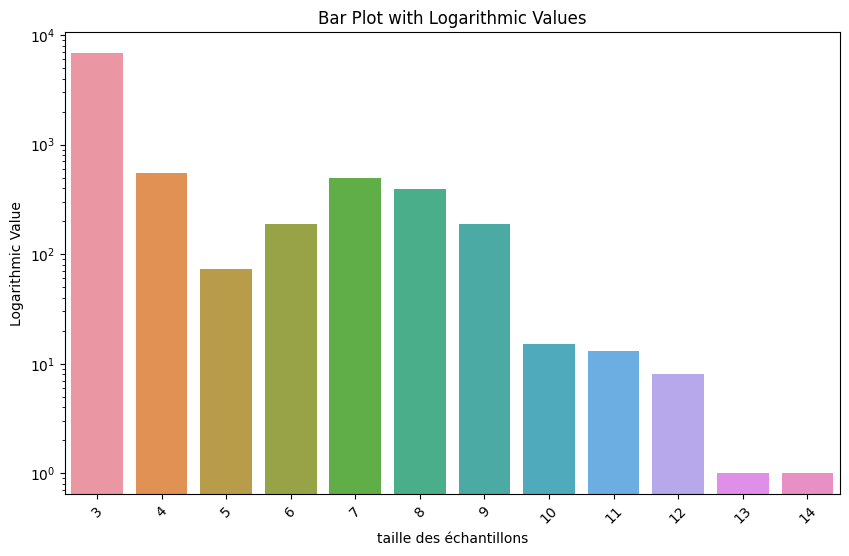

In [85]:
data = dict(Counter(michelle_2['occurences'].tolist()).most_common())

plot = pd.DataFrame(list(data.items()), columns=["taille des échantillons", "Nombre d'occurrences"])

plt.figure(figsize=(10, 6))
sns.barplot(x="taille des échantillons", y="Nombre d'occurrences", data=plot)
plt.ylabel("Logarithmic Value")
plt.yscale('log')
plt.xlabel("taille des échantillons")
plt.title("Bar Plot with Logarithmic Values")
plt.xticks(rotation=45)

plt.show()

In [105]:
michelle_2[michelle_2['occurences'] == 11]

,key_guerin,guerin,key_pdv,pdv,trigram_commun,resultat,occurences,tri_guerin,tri_pdv
330,guerin_18_2,notum facimus uniuersis tam presentibus quam f...,pdv_337_3,hac itaque consideratione commoniti notum faci...,True,"[[**notum**, **facimus**, **uniuersis**, **tam...",11,**notum** **facimus** **uniuersis** **tam** **...,hac itaque consideratione commoniti **notum** ...
331,guerin_18_2,notum facimus uniuersis tam presentibus quam f...,pdv_339_2,eapropter presenti priuilegio notum facimus un...,True,"[[**notum**, **facimus**, **uniuersis**, **tam...",11,**notum** **facimus** **uniuersis** **tam** **...,eapropter presenti priuilegio **notum** **faci...
1519,guerin_83_2,notum facimus uniuersis tam presentibus quam f...,pdv_342_4,hac itaque ratione commoniti presenti priuileg...,True,"[[**notum**, **facimus**, **uniuersis**, **tam...",11,**notum** **facimus** **uniuersis** **tam** **...,hac itaque ratione commoniti presenti priuileg...
2378,guerin_115_2,notum facimus uniuersis tam presentibus quam f...,pdv_339_2,eapropter presenti priuilegio notum facimus un...,True,"[[**notum**, **facimus**, **uniuersis**, **tam...",11,**notum** **facimus** **uniuersis** **tam** **...,eapropter presenti priuilegio **notum** **faci...
3699,guerin_177_2,notum facimus uniuersis tam presentibus quam f...,pdv_339_2,eapropter presenti priuilegio notum facimus un...,True,"[[**notum**, **facimus**, **uniuersis**, **tam...",11,**notum** **facimus** **uniuersis** **tam** **...,eapropter presenti priuilegio **notum** **faci...
3700,guerin_177_2,notum facimus uniuersis tam presentibus quam f...,pdv_342_4,hac itaque ratione commoniti presenti priuileg...,True,"[[**notum**, **facimus**, **uniuersis**, **tam...",11,**notum** **facimus** **uniuersis** **tam** **...,hac itaque ratione commoniti presenti priuileg...
3797,guerin_181_2,notum facimus uniuersis tam presentibus quam f...,pdv_339_2,eapropter presenti priuilegio notum facimus un...,True,"[[**notum**, **facimus**, **uniuersis**, **tam...",11,**notum** **facimus** **uniuersis** **tam** **...,eapropter presenti priuilegio **notum** **faci...
4214,guerin_197_2,notum facimus uniuersis tam presentibus quam f...,pdv_339_2,eapropter presenti priuilegio notum facimus un...,True,"[[**notum**, **facimus**, **uniuersis**, **tam...",11,**notum** **facimus** **uniuersis** **tam** **...,eapropter presenti priuilegio **notum** **faci...
4521,guerin_209_2,notum facimus uniuersis tam presentibus quam f...,pdv_337_3,hac itaque consideratione commoniti notum faci...,True,"[[**notum**, **facimus**, **uniuersis**, **tam...",11,**notum** **facimus** **uniuersis** **tam** **...,hac itaque consideratione commoniti **notum** ...
5060,guerin_226_2,notum facimus uniuersis tam presentibus quam f...,pdv_342_4,hac itaque ratione commoniti presenti priuileg...,True,"[[**notum**, **facimus**, **uniuersis**, **tam...",11,**notum** **facimus** **uniuersis** **tam** **...,hac itaque ratione commoniti presenti priuileg...


In [97]:
sample = michelle_2['tri_guerin'][4522].split()

In [102]:
new = []
for word in sample:
    if word.startswith('**'):
        new.append(word[2:-2])


In [134]:
damien = list(pdv.values())
noe = list(guerin.values())

In [49]:
def copies(liste):
    nouvelles_copies = []

    for element in liste:
        nouvelles_copies.extend([element] * len(dico_un))

    return nouvelles_copies

In [54]:
df['compare'] = df['clean_PDV'].apply(join)
df2['compare'] = df2['clean'].apply(join)

In [55]:
dico_un = {}

for i in range(len(df['compare'].tolist())):
    dico_un[f'pdv_{i+1}'] = df['compare'].tolist()[i]
    
dico_deux = {}

for i in range(len(df2['compare'].tolist())):
    dico_deux[f'guerin_{i+1}'] = df2['compare'].tolist()[i]

In [56]:
pierre_de_la_vigne = list(dico_un.values())*len(dico_deux)
cles_de_la_vigne = list(dico_un.keys())*len(dico_deux)

paul_guerin = copies(list(dico_deux.values()))
cles_paul = copies(list(dico_deux.keys()))

In [ ]:
antoine = pd.DataFrame({'guerin':paul_guerin,'pdv':pierre_de_la_vigne})
antoine['trigram_commun'] = antoine.apply(lambda row: avoir_trigram_commun(row["guerin"], row["pdv"]), axis=1)
antoine['key_guerin'] = cles_paul
antoine['key_pdv'] = cles_de_la_vigne
antoine = antoine[['key_guerin','guerin','key_pdv','pdv','trigram_commun']]
manoelle = antoine[antoine['trigram_commun'] == True]
manoelle = manoelle.reset_index(drop=True)
print(len(manoelle))

resultats = []
for index, row in tqdm(manoelle.iterrows()):
    try:
        resultat = test_2(row["guerin"], row["pdv"])
        resultats.append(resultat)
    except Exception as e:
        print(f"Erreur survenue pour la ligne {index}: {e}")
        resultats.append(None)

manoelle["resultat"] = resultats

7557


5107it [16:35:34,  9.21s/it] 

In [181]:
manoelle.to_excel('texte_guerin_pdv.xlsx')

In [245]:
han = []
trigrams = []

for i in tqdm(range(len(manoelle))):
    inter = []
    for tri in string_to_trigrams(manoelle['guerin'][i].split()):
        if tri in string_to_trigrams(manoelle['pdv'][i].split()):
            inter.append(tri)
    han.append(len(inter))
    trigrams.append(inter)

100%|███████████████████████████████████████| 7557/7557 [05:02<00:00, 25.00it/s]


In [67]:
def flatten_tri(liste):
    return [trigram for sublist in liste for trigram in sublist]

In [246]:
manoelle['nombre_trigrams'] = han
manoelle['trigrams'] = trigrams

In [285]:
test = manoelle[manoelle['nombre_trigrams'] > 1].reset_index(drop=True)

In [290]:
test['flat'] = test['trigrams'].apply(flatten_tri)
test['flat'] = test ['flat'].apply(join)

In [318]:
liste_ind = []
liste_texte = []

for i in range(len(test['flat'])):
    if test['flat'][i].startswith(''):
        liste_ind.append(i)
        liste_texte.append(test['flat'][i])
Counter(liste_texte).most_common()

[('regni nostri et et fidelibus nostris', 1),
 ('regni nostri et nostri et maxime qui super hoc', 1)]

In [72]:
delete = ['notum facimus uniuersis facimus uniuersis tam uniuersis tam presentibus tam presentibus quam presentibus quam futuris',
         'notum facimus uniuersis facimus uniuersis tam uniuersis tam presentibus tam presentibus quam presentibus quam futuris quam futuris quod',
         'notum facimus uniuersis tam presentibus quam presentibus quam futuris',
         'notum facimus uniuersis tam presentibus quam presentibus quam futuris quam futuris quod',
         'notum facimus uniuersis facimus uniuersis tam uniuersis tam presentibus tam presentibus quam presentibus quam futuris quam futuris quod futuris quod nos',
         'notum facimus uniuersis notum facimus uniuersis','notum facimus uniuersis futuris quod nos',
         'notum facimus uniuersis tam presentibus quam presentibus quam futuris quam futuris quod futuris quod cum',
         'notum facimus uniuersis futuris quod nos quod nos attendentes','notum facimus uniuersis futuris quod cum',
         'notum facimus uniuersis notum facimus uniuersis facimus uniuersis tam uniuersis tam presentibus tam presentibus quam presentibus quam futuris quam futuris quod',
         'notum facimus uniuersis notum facimus uniuersis notum facimus uniuersis',
         'notum facimus uniuersis facimus uniuersis tam','notum facimus uniuersis facimus uniuersis tam uniuersis tam presentibus tam presentibus quam presentibus quam futuris notum facimus uniuersis facimus uniuersis tam uniuersis tam presentibus tam presentibus quam presentibus quam futuris',
         'futuris quod nos quod nos attendentes']

In [71]:
def same_flat(string):
    if string in delete:
        return True
    else:
        return False

In [73]:
test['notum'] = test['flat'].apply(same_flat)
test = test[test['notum'] == False].reset_index(drop=True)

TypeError: 'function' object is not subscriptable

In [58]:
def same_tri(liste):
    return liste[0] == liste[1]

In [320]:
resultats = []
for index, row in tqdm(test.iterrows()):
    try:
        resultat = test_2(row["guerin"], row["pdv"])
        resultats.append(resultat)
    except Exception as e:
        print(f"Erreur survenue pour la ligne {index}: {e}")
        resultats.append(None)

test["resultat"] = resultats

86it [32:41, 22.81s/it] 


KeyboardInterrupt: 

In [331]:
vivi = pd.read_excel('pdv_viard_trigram.xlsx')
vivi = vivi[['key_viard','viard','key_pdv','pdv']]

In [332]:
han = []
trigrams = []

for i in tqdm(range(len(vivi))):
    inter = []
    for tri in string_to_trigrams(vivi['viard'][i].split()):
        if tri in string_to_trigrams(vivi['pdv'][i].split()):
            inter.append(tri)
    han.append(len(inter))
    trigrams.append(inter)

100%|██████████████████████████████████████| 1410/1410 [00:01<00:00, 880.75it/s]


In [337]:
vivi[vivi['nombre_trigrams']>1]

,key_viard,viard,key_pdv,pdv,nombre_trigrams,trigrams
6,viard_1_1,philippus ualesii et andegauie comes francie e...,pdv_235_2,quare maiestatis nostrae humiliter supplicauit...,3,"[[humiliter, supplicauit, ut], [supplicauit, u..."
18,viard_1_1,philippus ualesii et andegauie comes francie e...,pdv_348_1,notum facimus uniuersis quod maiestati nostrae...,2,"[[notum, facimus, uniuersis], [humiliter, supp..."
19,viard_1_1,philippus ualesii et andegauie comes francie e...,pdv_350_2,per presens igitur scriptum notum facimus uniu...,2,"[[notum, facimus, uniuersis], [futuris, quod, ..."
41,viard_1_2,nos igitur eiusdem in hac parte supplicationib...,pdv_339_2,eapropter presenti priuilegio notum facimus un...,2,"[[de, speciali, gratia], [et, heredibus, suis]]"
44,viard_1_2,nos igitur eiusdem in hac parte supplicationib...,pdv_356_3,et iustitiarium sistens cum omnibus iustitiis ...,2,"[[de, speciali, gratia], [et, heredibus, suis]]"
...,...,...,...,...,...,...
1391,viard_63_2,igitur ad instantem supplicationem dicti consa...,pdv_339_2,eapropter presenti priuilegio notum facimus un...,2,"[[et, ex, certa], [ex, certa, scientia]]"
1394,viard_63_2,igitur ad instantem supplicationem dicti consa...,pdv_343_3,usus et approbatas consuetudines quibus tempor...,2,"[[et, ex, certa], [ex, certa, scientia]]"
1395,viard_63_2,igitur ad instantem supplicationem dicti consa...,pdv_347_2,inde est quod cum magister de fidelis noster ...,2,"[[et, ex, certa], [ex, certa, scientia]]"
1397,viard_63_3,et si aliquid in contrarium factum fuerit illu...,pdv_21_18,sicque de negotiorum nostrorum omnium prospera...,2,"[[statum, pristinum, et], [pristinum, et, debi..."


In [338]:
len(viard)

611

# Viard texte

In [59]:
dico_un = {}

for i in range(len(df['compare'].tolist())):
    dico_un[f'pdv_{i+1}'] = df['compare'].tolist()[i]

In [60]:
df2 = pd.DataFrame({'viard_texts':df_viard['text'],'clean_viard':df_viard['text'].apply(clean_text)})

column_without_brackets = [[string.replace('[', '').replace(']', '').lstrip().rstrip() for string in sublist] for sublist in df2['clean_viard']]

df2['clean'] = column_without_brackets
df2['compare'] = df2['clean'].apply(join)
viard = {}
for i in range(len(df2['compare'].tolist())):
    viard[f'viard_{i+1}'] = df2['compare'].tolist()[i]

In [61]:
pierre_de_la_vigne = list(dico_un.values())*len(viard)
cles_de_la_vigne = list(dico_un.keys())*len(viard)

jean_viard = copies(list(viard.values()))
cles_jean = copies(list(viard.keys()))

In [62]:
tqdm.pandas()
zoe = pd.DataFrame({'viard':jean_viard,'pdv':pierre_de_la_vigne})

zoe['trigram_commun'] = zoe.progress_apply(lambda row: avoir_trigram_commun(row["viard"], row["pdv"]), axis=1)
zoe['key_viard'] = cles_jean
zoe['key_pdv'] = cles_de_la_vigne
zoe = zoe[['key_viard','viard','key_pdv','pdv','trigram_commun']]
lucie = zoe[zoe['trigram_commun'] == True]
lucie = lucie.reset_index(drop=True)
print(len(lucie))

100%|█████████████████████████████████████| 23595/23595 [15:33<00:00, 25.26it/s]

1134


In [64]:
han = []
trigrams = []

for i in tqdm(range(len(lucie))):
    inter = []
    for tri in string_to_trigrams(lucie['viard'][i].split()):
        if tri in string_to_trigrams(lucie['pdv'][i].split()):
            inter.append(tri)
    han.append(len(inter))
    trigrams.append(inter)

100%|███████████████████████████████████████| 1134/1134 [01:36<00:00, 11.70it/s]


In [65]:
lucie['nombre_trigrams'] = han
lucie['trigrams'] = trigrams

In [68]:
lucie['flat'] = lucie['trigrams'].apply(flatten_tri)
lucie['flat'] = lucie ['flat'].apply(join)

In [69]:
lucie = lucie[lucie['nombre_trigrams']>1]

In [74]:
liste_ind = []
liste_texte = []

for i in range(len(lucie['flat'])):
    if lucie['flat'][i].startswith('notum facimus'):
        liste_ind.append(i)
        liste_texte.append(lucie['flat'][i])
Counter(liste_texte).most_common()

KeyError: 0

In [75]:
lucie['notum'] = lucie['flat'].apply(same_flat)

In [76]:
mich = lucie[lucie['notum'] == False].reset_index(drop=True)

In [77]:
len(liste_ind)

0

In [81]:
Counter(mich['nombre_trigrams'].tolist()).most_common()

[(2, 110),
 (3, 62),
 (4, 36),
 (5, 17),
 (7, 14),
 (6, 11),
 (8, 6),
 (12, 4),
 (13, 4),
 (10, 2),
 (9, 2),
 (16, 2),
 (11, 2),
 (14, 1)]

In [82]:
def delete_notum(liste):
    liste_finale = []
    for first in liste:
        if first != ['notum','facimus','uniuersis'] and first != ['facimus','uniuersis','tam'] and first != ['uniuersis','tam','presentibus'] and first != ['tam','presentibus','quam'] and first != ['et','ex','certa'] and first != ['ex','certa','scienta']:
            liste_finale.append(first)
    return liste_finale

In [83]:
mich['test'] = mich['trigrams'].apply(delete_notum)

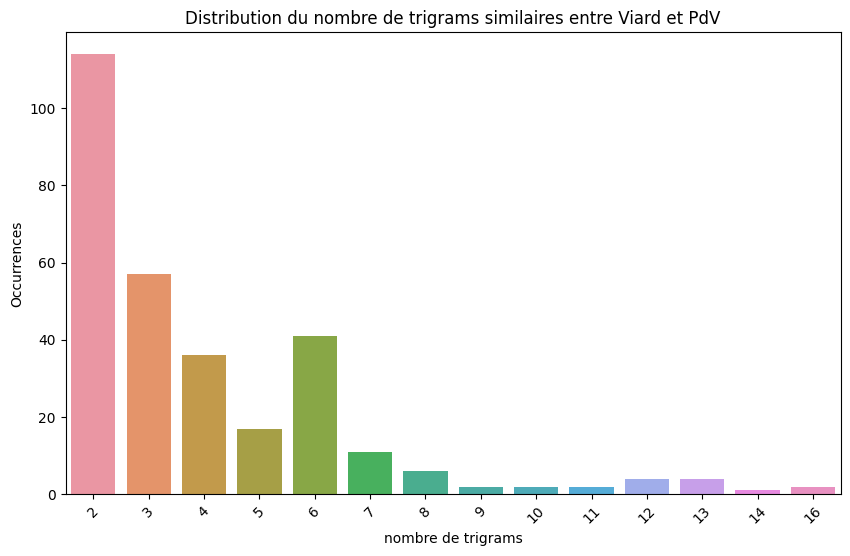

In [381]:
data = dict(Counter(mich['nombre_trigrams'].tolist()).most_common())

plot = pd.DataFrame(list(data.items()), columns=["nombre de trigrams", "Nombre d'occurrences"])

plt.figure(figsize=(10, 6))
sns.barplot(x="nombre de trigrams", y="Nombre d'occurrences", data=plot)
plt.ylabel("Occurrences")
#plt.yscale('log')
plt.xlabel("nombre de trigrams")
plt.title("Distribution du nombre de trigrams similaires entre Viard et PdV")
plt.xticks(rotation=45)

plt.show()

In [63]:
word_list_counter = Counter(tuple(sublist) for sublist_list in mich["trigrams"] for sublist in sublist_list).most_common()

NameError: name 'mich' is not defined

In [84]:
trigrams_delete = [['tam', 'presentibus', 'quam'],['notum', 'facimus', 'uniuersis'],
                  ['presentibus', 'quam', 'futuris'],['uniuersis', 'tam', 'presentibus'],
                  ['quam', 'futuris', 'quod'],['de', 'speciali', 'gratia'],
                  ['et', 'ex', 'certa'],['ex', 'certa', 'scientia'],['speciali', 'gratia', 'et'],
                  ['futuris', 'quod', 'nos'],['presentes', 'litteras', 'inspecturis'],
                   ['uniuersis', 'presentes', 'litteras'],
                  ['facimus','uniuersis','tam'],['de','regno','nostro'],
                  ['in','regno','nostro'],['et','regni','nostri'],['regni','nostri','et']]

In [85]:
def remove_lists(row):
    return [sublist for sublist in row if sublist not in trigrams_delete]

In [86]:
mich['final_grams'] = mich['trigrams'].apply(remove_lists)

In [87]:
filtered_df = mich[mich["final_grams"].apply(lambda x: all(sublist for sublist in x))]

In [88]:
def empty_lists(liste):
    return liste != []

In [89]:
mich['not_empty'] = mich['final_grams'].apply(empty_lists)

In [90]:
haha = mich[mich['not_empty'] == True].reset_index(drop=True)

In [91]:
haha

,key_viard,viard,key_pdv,pdv,trigram_commun,nombre_trigrams,trigrams,flat,notum,test,final_grams,not_empty
0,viard_1,philippus ualesii et andegauie comes francie e...,pdv_62,curas nostras consideratio studiosa sollicitat...,True,2,"[[ut, super, hoc], [ad, hoc, per]]",ut super hoc ad hoc per,False,"[[ut, super, hoc], [ad, hoc, per]]","[[ut, super, hoc], [ad, hoc, per]]",True
1,viard_1,philippus ualesii et andegauie comes francie e...,pdv_235,exposuit excellentiae nostrae b de fidelis no...,True,3,"[[humiliter, supplicauit, ut], [supplicauit, u...",humiliter supplicauit ut supplicauit ut super ...,False,"[[humiliter, supplicauit, ut], [supplicauit, u...","[[humiliter, supplicauit, ut], [supplicauit, u...",True
2,viard_1,philippus ualesii et andegauie comes francie e...,pdv_245,imperialis beneuolentia fidelium subiectorum e...,True,3,"[[humiliter, supplicauit, ut], [in, hac, parte...",humiliter supplicauit ut in hac parte de speci...,False,"[[humiliter, supplicauit, ut], [in, hac, parte...","[[humiliter, supplicauit, ut], [in, hac, parte]]",True
3,viard_1,philippus ualesii et andegauie comes francie e...,pdv_326,fidelium nostrorum eterna memoria nostro recon...,True,2,"[[de, speciali, gratia], [et, heredibus, suis]]",de speciali gratia et heredibus suis,False,"[[de, speciali, gratia], [et, heredibus, suis]]","[[et, heredibus, suis]]",True
4,viard_1,philippus ualesii et andegauie comes francie e...,pdv_333,opus in nobis egregium clementia suggerente pe...,True,2,"[[notum, facimus, uniuersis], [et, heredibus, ...",notum facimus uniuersis et heredibus suis,False,"[[et, heredibus, suis]]","[[et, heredibus, suis]]",True
...,...,...,...,...,...,...,...,...,...,...,...,...
164,viard_63,philippus dei gracia francorum rex notum facim...,pdv_17,ad uos est hoc uerbum filii effrem male tenden...,True,2,"[[ad, statum, pristinum], [ad, statum, pristin...",ad statum pristinum ad statum pristinum,False,"[[ad, statum, pristinum], [ad, statum, pristin...","[[ad, statum, pristinum], [ad, statum, pristin...",True
165,viard_63,philippus dei gracia francorum rex notum facim...,pdv_21,leuate in circuitu oculos uestros arrigite fil...,True,6,"[[in, regno, nostro], [in, regno, nostro], [st...",in regno nostro in regno nostro statum pristin...,False,"[[in, regno, nostro], [in, regno, nostro], [st...","[[statum, pristinum, et], [pristinum, et, debi...",True
166,viard_63,philippus dei gracia francorum rex notum facim...,pdv_35,subministrante nouorum emergentium uarietate m...,True,3,"[[ex, certa, scientia], [alii, de, regno], [al...",ex certa scientia alii de regno alii de regno,False,"[[ex, certa, scientia], [alii, de, regno], [al...","[[alii, de, regno], [alii, de, regno]]",True
167,viard_63,philippus dei gracia francorum rex notum facim...,pdv_115,semper hactenus ut loquamur ad litteram contin...,True,5,"[[in, regno, nostro], [in, regno, nostro], [re...",in regno nostro in regno nostro regni nostri e...,False,"[[in, regno, nostro], [in, regno, nostro], [re...","[[per, regnum, nostrum]]",True


In [155]:
resultats = []
for index, row in tqdm(test.iterrows()):
    try:
        resultat = test_2(row["viard"], row["pdv"])
        resultats.append(resultat)
    except Exception as e:
        print(f"Erreur survenue pour la ligne {index}: {e}")
        resultats.append(None)

test["resultat"] = resultats

164it [2:21:47, 51.88s/it] 


In [156]:
test.to_excel('viard_pdv_final.xlsx')

In [160]:
test

,key_viard,viard,key_pdv,pdv,trigram_commun,nombre_trigrams,trigrams,flat,notum,final_grams,not_empty,resultat
0,viard_1,philippus ualesii et andegauie comes francie e...,pdv_62,curas nostras consideratio studiosa sollicitat...,True,2,"[[ut, super, hoc], [ad, hoc, per]]",ut super hoc ad hoc per,False,"[[ut, super, hoc], [ad, hoc, per]]",True,"[[philippus, ualesii, et, andegauie, comes, fr..."
1,viard_1,philippus ualesii et andegauie comes francie e...,pdv_235,exposuit excellentiae nostrae b de fidelis no...,True,3,"[[humiliter, supplicauit, ut], [supplicauit, u...",humiliter supplicauit ut supplicauit ut super ...,False,"[[humiliter, supplicauit, ut], [supplicauit, u...",True,"[[philippus, ualesii, et, andegauie, comes, fr..."
2,viard_1,philippus ualesii et andegauie comes francie e...,pdv_245,imperialis beneuolentia fidelium subiectorum e...,True,3,"[[humiliter, supplicauit, ut], [in, hac, parte...",humiliter supplicauit ut in hac parte de speci...,False,"[[humiliter, supplicauit, ut], [in, hac, parte]]",True,"[[philippus, ualesii, et, andegauie, comes, fr..."
3,viard_1,philippus ualesii et andegauie comes francie e...,pdv_326,fidelium nostrorum eterna memoria nostro recon...,True,2,"[[de, speciali, gratia], [et, heredibus, suis]]",de speciali gratia et heredibus suis,False,"[[et, heredibus, suis]]",True,"[[philippus, ualesii, et, andegauie, comes, fr..."
4,viard_1,philippus ualesii et andegauie comes francie e...,pdv_333,opus in nobis egregium clementia suggerente pe...,True,2,"[[notum, facimus, uniuersis], [et, heredibus, ...",notum facimus uniuersis et heredibus suis,False,"[[et, heredibus, suis]]",True,"[[philippus, ualesii, et, andegauie, comes, fr..."
...,...,...,...,...,...,...,...,...,...,...,...,...
159,viard_63,philippus dei gracia francorum rex notum facim...,pdv_17,ad uos est hoc uerbum filii effrem male tenden...,True,2,"[[ad, statum, pristinum], [ad, statum, pristin...",ad statum pristinum ad statum pristinum,False,"[[ad, statum, pristinum], [ad, statum, pristin...",True,"[[philippus, dei, gracia, francorum, rex, notu..."
160,viard_63,philippus dei gracia francorum rex notum facim...,pdv_21,leuate in circuitu oculos uestros arrigite fil...,True,6,"[[in, regno, nostro], [in, regno, nostro], [st...",in regno nostro in regno nostro statum pristin...,False,"[[statum, pristinum, et], [pristinum, et, debi...",True,"[[philippus, dei, gracia, francorum, rex, notu..."
161,viard_63,philippus dei gracia francorum rex notum facim...,pdv_35,subministrante nouorum emergentium uarietate m...,True,3,"[[ex, certa, scientia], [alii, de, regno], [al...",ex certa scientia alii de regno alii de regno,False,"[[alii, de, regno], [alii, de, regno]]",True,"[[philippus, dei, gracia, francorum, rex, notu..."
162,viard_63,philippus dei gracia francorum rex notum facim...,pdv_115,semper hactenus ut loquamur ad litteram contin...,True,5,"[[in, regno, nostro], [in, regno, nostro], [re...",in regno nostro in regno nostro regni nostri e...,False,"[[per, regnum, nostrum]]",True,"[[philippus, dei, gracia, francorum, rex, notu..."
